
# <center> CS  4783/5783
# <center> Fall 2022
# <center> Assignment 3 – Convolutional Neural Networks 
# <center> Due: 11/01/2022 11:59 pm
# <center> Submitted By: Haridas Das

# Code Compile

Click Runtime --> Restart Runtime

This will clear out all variables from memory and let you start over.

In [ ]:
# Load Drive and mount
from google.colab import drive 
#load mounting drive to access the files on the google MyDrive. 
drive.mount('/content/drive')

Mounted at /content/drive


# Some Important Remarks on this Assignment 

# Fisrt: CNN output shape illustration
In a grayscale image, the data is a matrix of dimensions w×h, where w is the width of the image and h is its height. Perhaps, in the CNN (batch size, width, height, channel). In a color image, we usually have three channels: red, green, and blue; this way, a color image can be represented as a matrix of dimensions w×h×c, where c is the number of channels, that is, 3. The problem is: If we divide by three, that converts into a single color, which sometimes makes life difficult to classify. 

# Second: Three Possible Normalization Process
Usually a binary image have value between 0-255. We can do normalize in three ways. 
1.  We can divide the train and test image by the max of the value between 0-255, i.e., we can divide by 255.

2. We can divide the train and test image by the panels, i.e., 3, to convert it into gray color. Then subtract by the mean and divide it by the mean or standard deviation of the value between 0-255. Better to divide by mean as a standard deviation of 0-255 is not an integer. 

3. Subtract the train and test image by the panels mean of the value 0-255. Then, divide the resultant of the train and test image by the max value of 0-255, i.e., 255.  


# Third: Use the seed to make the output consistent in CNNs

1. import numpy as np
2. np.random.seed(any_number_here)

So when we write np.random.seed(any_number_here) the algorithm will output a particular set of numbers, i.e., unique to the argument any_number_here. So a particular set of random numbers can be obtained if we pass the correct argument. But this will require us to know how the algorithm works, which is quite tedious.
So, for example, if we write np.random.seed(10), the particular set of numbers that I obtain will remain the same even if I execute the same line anytime later. 

# Problem 1
Design a convolutional neural network in Keras of at least 10 convolutional layers. Use the MNIST
dataset for evaluation. You must try three designs as detailed below and provide your
observations on the performance of each:

1. A regular CNN where the number of filters in each layer increases as the depth of the
network grows i.e., the Lth layer will have more filters than the (L-1)th layer.

2. An inverted CNN where the number of filters in each layer decreases as the depth of the
network grows i.e., the Lth layer will have less filters than the (L-1)th layer.

3. An hour-glass shaped CNN where the number of filters will increase till the Lth layer and
reduce afterwards.

Your goal is to design these networks and optimize them to their best performance by choosing
the right hyperparameters for each network, such as the learning rate, batch size and the choice
of optimizer (‘SGD’, ‘adam’, ‘RMSProp’). You must provide a detailed report of what values you
tried for each hyperparameters, your observations on why the network performed well (or not)
and the final accuracy for each network on the MNIST dataset.
You can refer to the Keras documentation for more details.

# Slution of Problem 1

In [ ]:
# Load the TensorBoard notebook extension.
%load_ext tensorboard

from datetime import datetime # The datetime module supplies classes for manipulating dates and times. 

from packaging import version # A Version instance is comparison aware and can be compared and sorted using the standard Python interfaces.

import tensorflow as tf
# It uses Python as a convenient front-end and runs it efficiently in optimized C++. 
## Tensorflow allows developers to create a graph of computations to perform. 
### Each node in the graph represents a mathematical operation, and each connection represents data.

from tensorflow import keras
# Keras is the high-level API of TensorFlow 2: an approachable, highly-productive interface for solving MLproblems, with a focus on modern deep learning.
## with a focus on modern deep learning. It provides essential abstractions and building blocks for developing and shipping machine learning solutions with high iteration velocity.

import tensorboard # TensorBoard is a built-in tool for providing measurements and visualizations in TensorFlow.

import matplotlib.pyplot as plt  # Ploting MATLAB like routines

import numpy as np

# Extra 

#from keras.models import Model
#from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten


# Problem 1: Part 1

# Load the MNIS dataset and split the data set into train and test using keras

In [ ]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


# Normalize the train and test data for better output

In [ ]:
train_images = train_images / 255.0
test_images  = test_images /255.0
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


# numpy.expand_dims() function

1. The expand_dims() function in NumPy is used to expand the shape of an input array that is passed to it. This operation is done in such a way that when a new axis is inserted, it appears in the axis position of the resulting expanded array shape.

2. Axis in NumPy is defined for arrays that have more than one dimension. For example, a 2-D array has two corresponding axes: the axes running vertically downward across rows (this is axis 0) and the axes running horizontally across columns (this is axis 1).

# Parameter values

The expand_dims() function takes the following values:

a: This is the input array.
axis: This is the position in the resulting array where the new axis is to be positioned.

# Return value
The expand_dims() function returns a view of the input array with an increased number of dimensions.


Refereence: https://www.educative.io/answers/what-is-the-numpyexpanddims-function-in-numpy

# Increased dimensions in train and test data

In [ ]:
train_images, test_images = np.expand_dims(train_images, axis=-1), np.expand_dims(test_images, axis=-1)

# About the Data
The MNIST (Modified National Institute of Standards and Technology) dataset contains 60,000 training data and 10,000 test data. The MNIST database of handwritten digits.It is the all images are 28 by 28 pixels with a single channel for black-and-white images. We can also see that pixel values are integer values between 0 and 255. 

The ImageDataGenerator class can be used to rescale pixel values from the range of 0-255 to the range 0-1 preferred for neural network models. Scaling data to the range of 0-1 is traditionally referred to as normalization. To do this, we divided by 255 to have the better accuracy. 

Details: https://en.wikipedia.org/wiki/MNIST_database

In [ ]:
#(train_images, train_labels)

Number of labels in the trained data 10


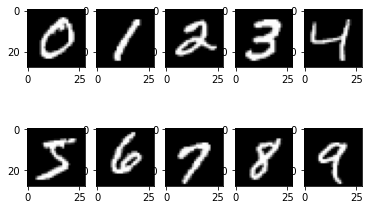

In [ ]:
# Compute the unique numbers from the train labels

classes = np.unique(train_labels)
nclasses = len(classes)
print('Number of labels in the trained data',nclasses)

# The following presents the level data. 

fig, ax = plt.subplots(2,5)  # two rows five columns. Perhaps, fig does not impact too much, but without "fig" ax.flatten() would not work.
ax = ax.flatten()  # flatten converts into array
for i in range(10): # 10 since we are considered 10 subplots
    im_idx = np.argwhere(train_labels == i)[0] # testing the training lavels where it gets 0,1,2,3,4,...,9. 
    plottable_image = np.reshape(train_images[im_idx], (28, 28)) # it collect the images using the training data and im_idx, and reshaped it by 28 by 28
    ax[i].imshow(plottable_image, cmap='gray') # Print the images one by one, starting at 0 until digit 9. 
    

# Keras sequential class 
It deals with ordering or sequencing of layers within a model. Syntax representing the creation.

tf.keras.Sequential (layers=No_lyr, name=No_lyr)

# model.summary() 

It is used to see all parameters and shapes in each layers in our models. 



# Problem # 1 : Part 1

# Model Building Plan

We now create our model. We will add up Convo layers followed by pooling layers. Then we will connect Dense(FC) layer to predict the classes. Input data fed to first Convo layer, output of that Convo layer acts as input for next Convo layer and so on. Finally data is fed to FC layer which try to predict the correct labels.

# Case 1: NoLyr

In [ ]:
# Define the number of layers
noconlyr=10
NoLyr = np.zeros((noconlyr,1))
for i in range (noconlyr):
  NoLyr[i] = int(10*(i+1))
NoLyr=NoLyr.flatten() 
NoLyr

array([ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.])

# Case 2: NoLyr

In [ ]:
# Define the number of layers
noconlyr=10
NoLyr = np.zeros((noconlyr,1))
for i in range (noconlyr):
  NoLyr[i] = int(2**(i+2))
NoLyr=NoLyr.flatten() 
NoLyr

array([   4.,    8.,   16.,   32.,   64.,  128.,  256.,  512., 1024.,
       2048.])

# Create the convolutional networks

The code below define the convolutional base using a common pattern: Conv2D and MaxPooling2D layers.

In [ ]:
# The first two layers with 28 filters of window size fxf
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

f=3 # read the filter shape

def regu_cnn_model_building():
  model_1 = tf.keras.models.Sequential()
  model_1.add(tf.keras.layers.Conv2D(NoLyr[0],(f,f),padding='same',activation='relu')) # padding='same' means with zero padding
  model_1.add(tf.keras.layers.Conv2D(NoLyr[1],(f,f),padding='same',activation='relu'))
  model_1.add(tf.keras.layers.Conv2D(NoLyr[2],(f,f),strides=(2,2),padding='same',activation='relu'))
  model_1.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
  model_1.add(tf.keras.layers.Conv2D(NoLyr[3],(f,f),padding='same',activation='relu'))
  model_1.add(tf.keras.layers.Conv2D(NoLyr[4],(f,f),padding='same',activation='relu'))
  model_1.add(tf.keras.layers.Conv2D(NoLyr[5],(f,f),strides=(2,2),padding='same',activation='relu'))
  model_1.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
  model_1.add(tf.keras.layers.Conv2D(NoLyr[6],(f,f),padding='same',activation='relu'))
  model_1.add(tf.keras.layers.Conv2D(NoLyr[7],(f,f),padding='same',activation='relu'))
  model_1.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
  model_1.add(tf.keras.layers.Conv2D(NoLyr[8],(f,f),padding='same',activation='relu'))
  model_1.add(tf.keras.layers.Conv2D(NoLyr[9],(f,f),padding='same',activation='relu'))
  #model_1.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
  #model_1.add(tf.keras.layers.Conv2D(NoLyr[10],(f,f),padding='same',activation='relu'))
  # we need to Con2D at the end otherwise it will not be compiled if we close with the MaxPooling2D 
  # if we increse aniother Conv2D, that decreses the accuarcy so neglect it. 
   
  #Add Dense layers on top
  #To complete the model, you will feed the last output tensor from the convolutional base (of shape (f, f, 100)) 
  ## into one or more Dense layers to perform classification. 
  ### Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor. 
  #### First, we will flatten (or unroll) the 3D output to 1D, then add one or more Dense layers on top. 
  #### As the dat has 10 output classes, so we use a final Dense layer with 10 outputs.
  #model_1.add(tf.keras.layers.Dense(256,activation='relu'))
  model_1.add(tf.keras.layers.Flatten())
  model_1.add(tf.keras.layers.Dense(256))
  model_1.add(tf.keras.layers.Activation('relu'))
  #model_1.add(tf.keras.layers.Dense(nclasses,activation='softmax'))
  model_1.add(tf.keras.layers.Dense(nclasses))
  model_1.add(tf.keras.layers.Activation('softmax'))
  return model_1

In [ ]:
# Compile and train the model, where the number of epoch is 5, which is very standard choice
# also the learning rate is 0.001  
model_01 = regu_cnn_model_building()
# Define the optimizer and the learning rate 
optimizer_and_learning_rate=tf.keras.optimizers.Adam(learning_rate=0.001)
model_01.compile(
    optimizer=optimizer_and_learning_rate,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
keras.layers.Flatten(input_shape=(1,28, 28,1))
train_loss_accuracy= model_01.fit(train_images, train_labels, batch_size=256, epochs=5)

Epoch 1/5
235/235 [==============================] - 12s 47ms/step - loss: 0.6428 - accuracy: 0.7685
Epoch 2/5
235/235 [==============================] - 11s 47ms/step - loss: 0.1038 - accuracy: 0.9718
Epoch 3/5
235/235 [==============================] - 11s 47ms/step - loss: 0.0648 - accuracy: 0.9829
Epoch 4/5
235/235 [==============================] - 11s 48ms/step - loss: 0.0465 - accuracy: 0.9874
Epoch 5/5
235/235 [==============================] - 11s 48ms/step - loss: 0.0365 - accuracy: 0.9897


# Let's display the architecture of our model so far using model.summary()

In [ ]:
model_01.summary()

Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_327 (Conv2D)         (None, 28, 28, 4)         40        
                                                                 
 conv2d_328 (Conv2D)         (None, 28, 28, 8)         296       
                                                                 
 conv2d_329 (Conv2D)         (None, 14, 14, 16)        1168      
                                                                 
 max_pooling2d_119 (MaxPooli  (None, 7, 7, 16)         0         
 ng2D)                                                           
                                                                 
 conv2d_330 (Conv2D)         (None, 7, 7, 32)          4640      
                                                                 
 conv2d_331 (Conv2D)         (None, 7, 7, 64)          18496     
                                                     

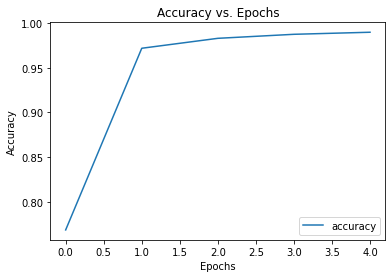

In [ ]:
plt.plot(train_loss_accuracy.history['accuracy'], label='accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

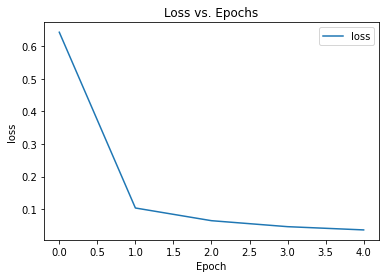

In [ ]:
plt.plot(train_loss_accuracy.history['loss'], label = 'loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(loc='upper right')
plt.show()

In [ ]:
# Evaluate the test Data 

test_loss, test_acc = model_01.evaluate(test_images,  test_labels, verbose=2)
print('Test losss is', test_loss)
print('Test accuracy is', test_acc)

313/313 - 3s - loss: 0.0400 - accuracy: 0.9883 - 3s/epoch - 11ms/step
Test losss is 0.03999101743102074
Test accuracy is 0.9883000254631042


# Analysis with the**learning rate is 0.001** :  

Comparison among the Optimizer SGD , adam and RMSOrop with different filter shapes with the **learning rate is 0.001**  

# Analysis on the filter shape f and Optimizer **SGD** w.r.t. accuary: 
In both cases, we use the optimizer **'SGD'** and batch_size=256, and epochs=5.

Case 1: NoLyr= array([ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.])
1. for f=1, the accuary is 0.1124 at the 5th epoch 
2. if f=2 , the accuary is 0.1124 at the 5th epoch 
3. if f=3 , the accuary is 0.1124 at the 5th epoch 
4. if f=4 , the accuary is 0.1124 at the 5th epoch

Note that when f=1, there is no massive change when f=2,3,4 in the accuracy, however, it is constant, so better to use f=1.


Case 2: NoLyr= array([   4.,    8.,   16.,   32.,   64.,  128.,  256.,  512., 1024.,
       2048.])
1. for f=1, the accuary is 0.1124 at the 5th epoch 
2. if f=2 , the accuary is 0.1124 at the 5th epoch 
3. if f=3 , the accuary is 0.1124 at the 5th epoch 
4. if f=4 , the accuary is 0.1124 at the 5th epoch

Note that when f=2, there is no massive change in the accuracy. In the contrary accuary is constant when f=2,3,and 4. Therefore we will use f=1 for further comparison.

# SGD does not give us good accuarcy. 

# Analysis on the filter shape f and Optimizer **adam** with respect to accuary:  
In both cases, we use the optimizer **'adam'** and batch_size=256, and epochs=5.

Case 1: NoLyr= array([ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.])
1. for f=1, the accuary is 0.2157 at the 5th epoch 
2. if f=2 , the accuary is 0.9760 at the 5th epoch 
3. if f=3 , the accuary is 0.9863 at the 5th epoch 
4. if f=4 , the accuary is 0.9853 at the 5th epoch

Note that when f=4, there is no increase in the accuracy, so better to use f=3.


Case 2: NoLyr= array([   4.,    8.,   16.,   32.,   64.,  128.,  256.,  512., 1024.,
       2048.])
1. for f=1, the accuary is 0.2123 at the 5th epoch 
2. if f=2 , the accuary is 0.99849 at the 5th epoch  
3. if f=3 , the accuary is 0.9901 at the 5th epoch 
4. if f=4 , the accuary is 0.9897 at the 5th epoch

Note that when f=4, there is no increase in the accuracy. Therefore we will use f=3 for further comparison.

# adam gives us better accuracy compare to 'SGD'.

# Analysis on the filter shape f and Optimizer **RMSProp** with respect to accuary:  
In both cases, we use the optimizer **'RMSProp'** and batch_size=256, and epochs=5.

Case 1: NoLyr= array([ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.])
1. for f=1, the accuary is 0.2085 at the 5th epoch, where test accuary 0.1982 
2. if f=2 , the accuary is 0.9760 at the 5th epoch, where test accuary 0.9512 
3. if f=3 , the accuary is 0.9868 at the 5th epoch, where test accuary 0.9871
4. if f=4 , the accuary is 0.9869 at the 5th epoch, where test accuary 0.9818

Note that when f=4, there is no massive change in the accuracy, so better to use f=3.


Case 2: NoLyr= array([   4.,    8.,   16.,   32.,   64.,  128.,  256.,  512., 1024.,
       2048.])
1. for f=1, the accuary is 0.1910 at the 5th epoch,  where test accuary 0.1974
2. if f=2 , the accuary is 0.9808 at the 5th epoch,  where test accuary 0.9659
3. if f=3 , the accuary is 0.9878 at the 5th epoch,  where test accuary 0.9850
4. if f=4 , the accuary is 0.9881 at the 5th epoch,  where test accuary 0.9884

Note that when f=4, there is no massive change in the accuracy. Therefore, we will use f=3 for further comparison.


# Conclusion: 

Optimizers adam' and 'RMSProp' almost give us the same accuracy compared to 'SGD'. Perhaps, Optimizers 'adam' gives better accuracy than  'RMSProp'. Moreover, the comparison suggest to use f=3. We, therefore, compare the learning rate and batch size using f=3. 

# Problem 1- Part 1:
We use the regular CNN where the number of filters in each layer increases as the depth of the network grows i.e., the Lth layer will have more filters than the (L-1)th layer.

# Comparison with respect to Different learning *rate*

In [ ]:
# Compile and train the model, where the number of epoch is 5, which is very standard choice
# Define the learning rates
learning_Rate=[0.0001, 0.001, 0.005, 0.01, 0.05, 0.1]
acc_wrt_diff_lern=np.zeros(len(learning_Rate))
test_loss = np.zeros(len(learning_Rate))
test_acc = np.zeros(len(learning_Rate))
for i in range (len(learning_Rate)):
  model_01 = regu_cnn_model_building()
  optimizer_and_learning_rate=tf.keras.optimizers.Adam(learning_rate=learning_Rate[i])
  model_01.compile(
    optimizer=optimizer_and_learning_rate,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
  keras.layers.Flatten(input_shape=(1,28, 28,1))
  train_loss_accuracy= model_01.fit(train_images, train_labels, batch_size=256, epochs=5)
  acc_wrt_diff_lern[i]=train_loss_accuracy.history['accuracy'][4]
  model_01.summary()
  test_loss[i], test_acc[i] = model_01.evaluate(test_images,  test_labels, verbose=2)

Epoch 1/5
235/235 [==============================] - 12s 48ms/step - loss: 1.1725 - accuracy: 0.5844
Epoch 2/5
235/235 [==============================] - 11s 48ms/step - loss: 0.4249 - accuracy: 0.8669
Epoch 3/5
235/235 [==============================] - 11s 49ms/step - loss: 0.2591 - accuracy: 0.9209
Epoch 4/5
235/235 [==============================] - 11s 48ms/step - loss: 0.1807 - accuracy: 0.9449
Epoch 5/5
235/235 [==============================] - 11s 48ms/step - loss: 0.1315 - accuracy: 0.9596
Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_337 (Conv2D)         (None, 28, 28, 4)         40        
                                                                 
 conv2d_338 (Conv2D)         (None, 28, 28, 8)         296       
                                                                 
 conv2d_339 (Conv2D)         (None, 14, 14, 16)        1168      
          

# Accuary and Loss vs. Learning rate 

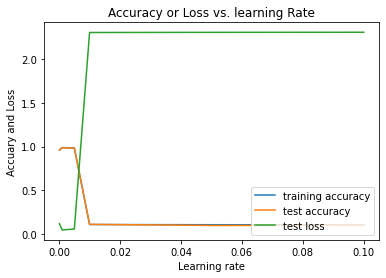

The learning rates are  [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1]
The acccuary in each learning rates are  [0.95955002 0.98893332 0.98481667 0.11151667 0.10916667 0.10801667]
Test losss is [0.12123839 0.05005222 0.06027238 2.30119658 2.30285621 2.30403686]
Test accuracy is [0.9619     0.98650002 0.98259997 0.1135     0.1009     0.1028    ]


In [ ]:
plt.plot(learning_Rate,acc_wrt_diff_lern, label='training accuracy')
plt.xlabel('Learning rate')
plt.ylabel('Accuary and Loss')
plt.plot(learning_Rate,test_acc, label='test accuracy')
plt.plot(learning_Rate,test_loss,label='test loss')
plt.title('Accuracy or Loss vs. learning Rate')
plt.legend(loc='lower right')
plt.show()
print('The learning rates are ',learning_Rate)
print('The acccuary in each learning rates are ',acc_wrt_diff_lern)
print('Test losss is', test_loss)
print('Test accuracy is', test_acc)

# Conclusion: 
In the training process, a learning rate of 0.001 gives us the best performance using the optimizer 'adam' with the batch size 256, epochs 5, and filter f=3 from the learning rates [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1].  And NoLyr= array([ 4., 8., 16., 32., 64., 128., 256., 512., 1024., 2048.]).

# Comparison with respect to batch size

In [ ]:
# Define the Different Batch sizes
batch_size=[50, 100, 150, 256, 512]
acc_wrt_diff_lern=np.zeros(len(batch_size))
test_loss = np.zeros(len(batch_size))
test_acc = np.zeros(len(batch_size))
for i in range (len(batch_size)):
  model_01 = regu_cnn_model_building()
  model_01.compile(
    optimizer='Adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
  keras.layers.Flatten(input_shape=(1,28, 28,1))
  train_loss_accuracy= model_01.fit(train_images, train_labels, batch_size=batch_size[i], epochs=5)
  acc_wrt_diff_lern[i]=train_loss_accuracy.history['accuracy'][4]
  model_01.summary()
  test_loss[i], test_acc[i] = model_01.evaluate(test_images,  test_labels, verbose=2)

Epoch 1/5
1200/1200 [==============================] - 11s 9ms/step - loss: 0.3016 - accuracy: 0.9004
Epoch 2/5
1200/1200 [==============================] - 11s 9ms/step - loss: 0.0700 - accuracy: 0.9809
Epoch 3/5
1200/1200 [==============================] - 11s 9ms/step - loss: 0.0525 - accuracy: 0.9866
Epoch 4/5
1200/1200 [==============================] - 11s 9ms/step - loss: 0.0473 - accuracy: 0.9881
Epoch 5/5
1200/1200 [==============================] - 11s 9ms/step - loss: 0.0388 - accuracy: 0.9905
Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_270 (Conv2D)         (50, 28, 28, 16)          160       
                                                                 
 conv2d_271 (Conv2D)         (50, 28, 28, 32)          4640      
                                                                 
 conv2d_272 (Conv2D)         (50, 14, 14, 64)          18496     
     

# Accuary and Loss vs. Different batch sizes 

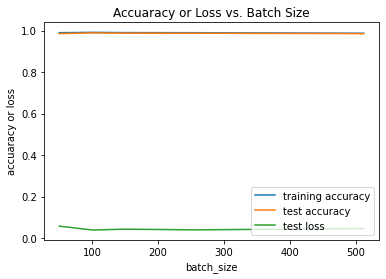

The batch_size are  [50, 100, 150, 256, 512]
Test accuracy is [0.98589998 0.98940003 0.98820001 0.98809999 0.98589998]
Test losss is [0.05707112 0.03830187 0.04233111 0.03908727 0.04530609]


In [ ]:
plt.plot(batch_size,acc_wrt_diff_lern, label='training accuracy')
plt.xlabel('batch_size')
plt.ylabel('accuaracy or loss')
plt.plot(batch_size,test_acc, label='test accuracy')
plt.plot(batch_size,test_loss,label='test loss')
plt.title('Accuaracy or Loss vs. Batch Size')
plt.legend(loc='lower right')
plt.show()
print('The batch_size are ',batch_size)
print('Test accuracy is', test_acc)
print('Test losss is', test_loss)

# Conclusion:

In the training process, the batch size 100 gives the best accuracy 0.98940003 using the optimizer 'adam' and filter f=3 and among the batch_size=[50, 100, 150, 256, 512], where the default learning rate is 0.001. And NoLyr= array([ 4., 8., 16., 32., 64., 128., 256., 512., 1024., 2048.]). 

# Problem # 1 : Part 2

We now inverted CNN where the number of filters in each layer decreases as the depth of the
network grows i.e., the Lth layer will have less filters than the (L-1)th layer.

In [ ]:
NoLyr=[4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]
# reversing list
NoLyr.reverse()
print('Reversed List:', NoLyr)

Reversed List: [2048, 1024, 512, 256, 128, 64, 32, 16, 8, 4]


# Comparison with respect to Different learning rates

In [ ]:
# Compile and train the model, where the number of epoch is 5, which is very standard choice
# Define the learning rates
learning_Rate=[0.0001, 0.001, 0.005, 0.01, 0.05, 0.1]
acc_wrt_diff_lern=np.zeros(len(learning_Rate))
test_loss = np.zeros(len(learning_Rate))
test_acc = np.zeros(len(learning_Rate))
for i in range (len(learning_Rate)):
  model_01 = regu_cnn_model_building()
  optimizer_and_learning_rate=tf.keras.optimizers.Adam(learning_rate=learning_Rate[i])
  model_01.compile(
    optimizer=optimizer_and_learning_rate,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
  keras.layers.Flatten(input_shape=(1,28, 28,1))
  train_loss_accuracy= model_01.fit(train_images, train_labels, batch_size=256, epochs=5)
  acc_wrt_diff_lern[i]=train_loss_accuracy.history['accuracy'][4]
  model_01.summary()
  # Evaluate the test Data 
  test_loss[i], test_acc[i] = model_01.evaluate(test_images,  test_labels, verbose=2)

Epoch 1/5
235/235 [==============================] - 24s 51ms/step - loss: 1.2946 - accuracy: 0.5264
Epoch 2/5
235/235 [==============================] - 11s 45ms/step - loss: 0.4794 - accuracy: 0.8443
Epoch 3/5
235/235 [==============================] - 11s 46ms/step - loss: 0.2657 - accuracy: 0.9201
Epoch 4/5
235/235 [==============================] - 11s 46ms/step - loss: 0.1868 - accuracy: 0.9442
Epoch 5/5
235/235 [==============================] - 11s 47ms/step - loss: 0.1404 - accuracy: 0.9592
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 4)         40        
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 8)         296       
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 16)        1168      
             

# Accuary and Loss vs. Learning rate 

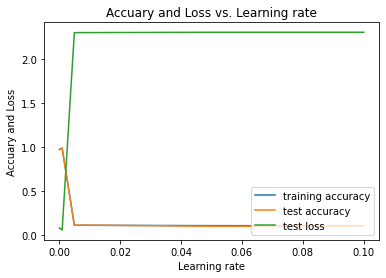

The learning rates are  [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1]
The acccuary in each learning rates are  [0.97273332 0.99059999 0.11236667 0.11163333 0.10821667 0.10575   ]
Test losss is [0.08137255 0.05931962 2.30106044 2.30157661 2.30513787 2.30535507]
Test accuracy is [0.9727     0.98339999 0.1135     0.1135     0.101      0.1009    ]


In [ ]:
plt.plot(learning_Rate,acc_wrt_diff_lern, label='training accuracy')
plt.xlabel('Learning rate')
plt.ylabel('Accuary and Loss')
# Comparison by test Data 
plt.plot(learning_Rate,test_acc, label='test accuracy')
plt.plot(learning_Rate,test_loss,label='test loss')
plt.title('Accuary and Loss vs. Learning rate')
plt.legend(loc='lower right')
plt.show()
print('The learning rates are ',learning_Rate)
print('The acccuary in each learning rates are ',acc_wrt_diff_lern)
print('Test losss is', test_loss)
print('Test accuracy is', test_acc)

# Conclusion: 
In the training process, a learning rate of 0.001 gives us the best performance using the optimizer 'adam' with the batch size 256, epochs 5, and filter f=3 from the learning rates [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1].  And NoLyr= array([ 4., 8., 16., 32., 64., 128., 256., 512., 1024., 2048.]).



# Comparison with respect to Different Batch sizes

In [ ]:
# Define the Different Batch Sizes
batch_size=[50, 100, 150, 256, 512]
acc_wrt_diff_lern=np.zeros(len(batch_size))
test_loss = np.zeros(len(batch_size))
test_acc = np.zeros(len(batch_size))
for i in range (len(batch_size)):
  model_01 = regu_cnn_model_building()
  model_01.compile(
    optimizer='Adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
  keras.layers.Flatten(input_shape=(1,28, 28,1))
  train_loss_accuracy= model_01.fit(train_images, train_labels, batch_size=batch_size[i], epochs=5)
  acc_wrt_diff_lern[i]=train_loss_accuracy.history['accuracy'][4]
  model_01.summary()
  # Evaluate the test Data
  test_loss[i], test_acc[i] = model_01.evaluate(test_images,  test_labels, verbose=2)

Epoch 1/5
1200/1200 [==============================] - 11s 9ms/step - loss: 0.3690 - accuracy: 0.8735
Epoch 2/5
1200/1200 [==============================] - 11s 9ms/step - loss: 0.0676 - accuracy: 0.9822
Epoch 3/5
1200/1200 [==============================] - 11s 9ms/step - loss: 0.0511 - accuracy: 0.9873
Epoch 4/5
1200/1200 [==============================] - 11s 9ms/step - loss: 0.0481 - accuracy: 0.9877
Epoch 5/5
1200/1200 [==============================] - 11s 9ms/step - loss: 0.0335 - accuracy: 0.9917
Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_320 (Conv2D)         (50, 28, 28, 16)          160       
                                                                 
 conv2d_321 (Conv2D)         (50, 28, 28, 32)          4640      
                                                                 
 conv2d_322 (Conv2D)         (50, 14, 14, 64)          18496     
     

# Accuary and Loss vs. Batch Size 

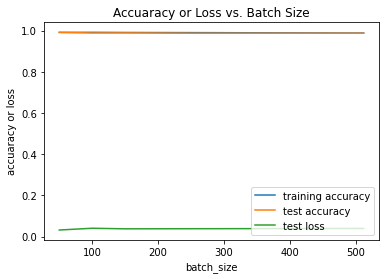

The batch_size are  [50, 100, 150, 256, 512]
Test accuracy is [0.99169999 0.98869997 0.98909998 0.9874     0.98760003]
Test losss is [0.03245419 0.04099526 0.03823227 0.03875732 0.03997308]


In [ ]:
plt.plot(batch_size,acc_wrt_diff_lern, label='training accuracy')
plt.xlabel('batch_size')
plt.ylabel('accuaracy or loss')
# Comparison using test Data
plt.plot(batch_size,test_acc, label='test accuracy')
plt.plot(batch_size,test_loss,label='test loss')
plt.title('Accuaracy or Loss vs. Batch Size')
plt.legend(loc='lower right')
plt.show()
print('The batch_size are ',batch_size)
print('Test accuracy is', test_acc)
print('Test losss is', test_loss)

# Conclusion:

In the training process, the batch size 50 gives us the best acuracy 0.9916999 using the optimizer 'adam' and filter f=3 and among the batch_size=[50, 100, 150, 256, 512], where the default learning rate is 0.001.  And NoLyr= array([ 4., 8., 16., 32., 64., 128., 256., 512., 1024., 2048.]) . 

# Problem # 1 : Part 3

We now use an hour-glass shaped CNN where the number of filters will increase till the Lth layer and reduce afterwards.

In [ ]:
NoLyr=[16, 32, 64, 128, 256, 270, 256, 128, 64, 32, 16]
print('List:', NoLyr)

List: [16, 32, 64, 128, 256, 270, 256, 128, 64, 32, 16]


# Comparison with respect to Different learning *rates*

In [ ]:
# Compile and train the model, where the number of epoch is 5, which is very standard choice
# Define the different learning rates
learning_Rate=[0.0001, 0.001, 0.005, 0.01, 0.05, 0.1]
acc_wrt_diff_lern=np.zeros(len(learning_Rate))
test_loss = np.zeros(len(learning_Rate))
test_acc = np.zeros(len(learning_Rate))
for i in range (len(learning_Rate)):
  model_01 = regu_cnn_model_building()
  optimizer_and_learning_rate=tf.keras.optimizers.Adam(learning_rate=learning_Rate[i])
  model_01.compile(
    optimizer=optimizer_and_learning_rate,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
  keras.layers.Flatten(input_shape=(1,28, 28,1))
  train_loss_accuracy= model_01.fit(train_images, train_labels, batch_size=256, epochs=5)
  acc_wrt_diff_lern[i]=train_loss_accuracy.history['accuracy'][4]
  model_01.summary()
  # Evaluate the test Data 
  test_loss[i], test_acc[i] = model_01.evaluate(test_images,  test_labels, verbose=2)

Epoch 1/5
235/235 [==============================] - 8s 30ms/step - loss: 1.1154 - accuracy: 0.6237
Epoch 2/5
235/235 [==============================] - 7s 30ms/step - loss: 0.2882 - accuracy: 0.9090
Epoch 3/5
235/235 [==============================] - 7s 31ms/step - loss: 0.1654 - accuracy: 0.9470
Epoch 4/5
235/235 [==============================] - 7s 30ms/step - loss: 0.1188 - accuracy: 0.9624
Epoch 5/5
235/235 [==============================] - 7s 31ms/step - loss: 0.0945 - accuracy: 0.9700
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_160 (Conv2D)         (None, 28, 28, 16)        160       
                                                                 
 conv2d_161 (Conv2D)         (None, 28, 28, 32)        4640      
                                                                 
 conv2d_162 (Conv2D)         (None, 14, 14, 64)        18496     
               

# Accuary and Loss vs. Different Learning rates 



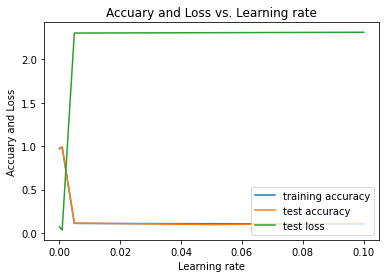

The learning rates are  [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1]
The acccuary in each learning rates are  [0.96998334 0.98978335 0.11236667 0.11068334 0.10846667 0.10471667]
Test losss is [0.07288197 0.03671937 2.3011663  2.30143642 2.30502319 2.31018519]
Test accuracy is [0.97600001 0.98979998 0.1135     0.1135     0.098      0.1135    ]


In [ ]:
plt.plot(learning_Rate,acc_wrt_diff_lern, label='training accuracy')
plt.xlabel('Learning rate')
plt.ylabel('Accuary and Loss')
# Comparison by test Data 
plt.plot(learning_Rate,test_acc, label='test accuracy')
plt.plot(learning_Rate,test_loss,label='test loss')
plt.title('Accuary and Loss vs. Learning rate')
plt.legend(loc='lower right')
plt.show()
print('The learning rates are ',learning_Rate)
print('The acccuary in each learning rates are ',acc_wrt_diff_lern)
print('Test losss is', test_loss)
print('Test accuracy is', test_acc)

# Conclusion: 
In the training process, a learning rate of 0.001 gives us the best performance using the optimizer 'adam' with the batch size 256, epochs 5, and filter f=3 from the learning rates [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1].  And NoLyr= array([ 4., 8., 16., 32., 64., 128., 256., 512., 1024., 2048.]).


# Comparison with respect to Different Batch sizes

In [ ]:
# Define the Different Batch Sizes
batch_size=[50, 100, 150, 256, 512]
acc_wrt_diff_lern=np.zeros(len(batch_size))
test_loss = np.zeros(len(batch_size))
test_acc = np.zeros(len(batch_size))
for i in range (len(batch_size)):
  model_01 = regu_cnn_model_building()
  model_01.compile(
    optimizer='Adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
  keras.layers.Flatten(input_shape=(1,28, 28,1))
  train_loss_accuracy= model_01.fit(train_images, train_labels, batch_size=batch_size[i], epochs=5)
  acc_wrt_diff_lern[i]=train_loss_accuracy.history['accuracy'][4]
  model_01.summary()
  # Evaluate the test Data
  test_loss[i], test_acc[i] = model_01.evaluate(test_images,  test_labels, verbose=2)

Epoch 1/5
1200/1200 [==============================] - 12s 9ms/step - loss: 0.2465 - accuracy: 0.9197
Epoch 2/5
1200/1200 [==============================] - 11s 9ms/step - loss: 0.0719 - accuracy: 0.9808
Epoch 3/5
1200/1200 [==============================] - 11s 9ms/step - loss: 0.0519 - accuracy: 0.9868
Epoch 4/5
1200/1200 [==============================] - 11s 9ms/step - loss: 0.0444 - accuracy: 0.9891
Epoch 5/5
1200/1200 [==============================] - 11s 9ms/step - loss: 0.0372 - accuracy: 0.9907
Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_220 (Conv2D)         (50, 28, 28, 16)          160       
                                                                 
 conv2d_221 (Conv2D)         (50, 28, 28, 32)          4640      
                                                                 
 conv2d_222 (Conv2D)         (50, 14, 14, 64)          18496     
     

# Accuary and Loss vs. Different Batch sizes 

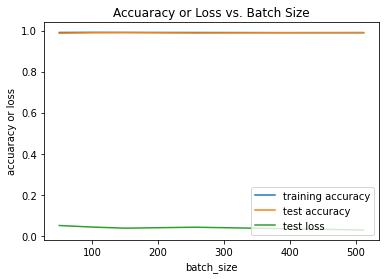

The batch_size are  [50, 100, 150, 256, 512]
Test accuracy is [0.98689997 0.9892     0.99019998 0.98799998 0.99080002]
Test losss is [0.05091329 0.04329754 0.0378929  0.04257491 0.02897004]


In [ ]:
plt.plot(batch_size,acc_wrt_diff_lern, label='training accuracy')
plt.xlabel('batch_size')
plt.ylabel('accuaracy or loss')
# Comparison using test Data
plt.plot(batch_size,test_acc, label='test accuracy')
plt.plot(batch_size,test_loss,label='test loss')
plt.title('Accuaracy or Loss vs. Batch Size')
plt.legend(loc='lower right')
plt.show()
print('The batch_size are ',batch_size)
print('Test accuracy is', test_acc)
print('Test losss is', test_loss)

# Conclusion:

In the training process, the batch size 512 gives us the best accuracy 0.99080002 using the optimizer 'adam' and filter f=3 and among the batch_size=[50, 100, 150, 256, 512], where the default learning rate is 0.001. And NoLyr= array([ 4., 8., 16., 32., 64., 128., 256., 512., 1024., 2048.]) . 


# Problem 2
Implement the LeNet Convolutional Neural Network using Keras. It is a seven-layer network with
three convolutional layers, two max-pooling layers and 2 dense layers. The structure is shown
below:

Layer 1: convolution layer with 6 convolution kernels of 5x5 with stride 1

Layer 2: max-pooling layer with 2x2 kernels with stride 2

Layer 3: convolution layer with 16 convolution kernels of 5x5 with stride 1

Layer 4: max-pooling layer with 2x2 kernels with stride 2

Layer 5: convolution layer with 120 convolution kernels of 5x5

Layer 6: dense layer with 84 neurons

Layer 7: output layer

Use the ‘Adam’ optimizer to train your network on the CIFAR-10 dataset for a fixed set of 25
epochs. You can use the built-in functions to load the data. Each image is 32x32x3 matrix and you
will have 60,000 images for training and 10,000 for test. There are 10 classes in the dataset each
representing an object in the image.
Perform the following analysis and answer each question briefly (3-5 sentences). Use plots and
figures as necessary.

1. What is the effect of learning rate on the training process? Which performed best?
2. What is the effect of batch size on the training process? Which performed best?
3. Try different hyperparameters to obtain the best accuracy on the test set. What is your
best performance and what were the hyperparameters?
4. Implement an equivalent feed forward network for the same task with each hidden layer
containing the same number of neurons as the number of filters in each convolution layer.
Use the ‘Adam’ optimizer to train your network on the CIFAR-10 dataset for a fixed set of
25 epochs. Compare its performance with your LeNet implementation based on the
following questions:
a. What is its performance?
b. How many parameters are there in this network compared to the LeNet implementation? Are they worth it?

# Solution of Problem 2:

In [ ]:
# Load the TensorBoard notebook extension.
%load_ext tensorboard

from datetime import datetime # The datetime module supplies classes for manipulating dates and times. 

from packaging import version # A Version instance is comparison aware and can be compared and sorted using the standard Python interfaces.

import tensorflow as tf
# It uses Python as a convenient front-end and runs it efficiently in optimized C++. 
## Tensorflow allows developers to create a graph of computations to perform. 
### Each node in the graph represents a mathematical operation, and each connection represents data.

from tensorflow import keras
# Keras is the high-level API of TensorFlow 2: an approachable, highly-productive interface for solving MLproblems, with a focus on modern deep learning.
## with a focus on modern deep learning. It provides essential abstractions and building blocks for developing and shipping machine learning solutions with high iteration velocity.

import tensorboard # TensorBoard is a built-in tool for providing measurements and visualizations in TensorFlow.

import matplotlib.pyplot as plt  # Ploting MATLAB like routines

import numpy as np

# Some more than the class 

#from keras.models import Model
#from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten
# set seed 
np.random.seed(10)
import random  # import random for generating random numbers
import math 
# Import statistics Library
import statistics


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
# load the CIFAR-10 dataset
tf.keras.datasets.cifar10.load_data()

# split the training and test data using keras
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Data frame information
Each image is 32x32x3 matrix and you
will have 50,000 images for training and 10,000 for test. There are 10 classes in the dataset each
representing an object in the image.

In [ ]:
x_train.shape

(50000, 32, 32, 3)

# Normalize the train and test data for better output

# Case 1: Normalize Process 1 

Just divide the train and test data by the maximum value which is 255 as the color is from 0-255. 

In [ ]:
#x_train = x_train / 255.0
#x_test  = x_test /255.0
#print(x_train.shape)
#print(x_test.shape)

This time we are going to use case to normalized data set.  

# Case 2:  Normalize Process 2 
As the data color is from 0-255, so total data point 256. We can use the $\frac{x-\mu}{\sigma}$, where $\mu $ mean and $\sigma$ is standard deviation. But  in this data set the values $0, ...,255$ represnts the omage color which are integer but the sd is not integer, so I just use the mean value instead. 

In [ ]:
# Coverting the colored image format (32X32X3) to the gray image (32X32X1) 
x_train = np.sum(x_train/3, axis=3, keepdims = True) # division by 3 makes will be the image shape (32X32X1)
x_test = np.sum(x_test/3, axis=3, keepdims = True) # keepdims = true; dimensions of the array(Matrix) will be saved.
m=statistics.mean(range (255))
x_train = (x_train - m) / m
x_test = (x_test - m) / m
#from colered image (32,32,3), cob=vert into gray image (32,32,1)
x_train.shape

(50000, 32, 32, 1)

In [ ]:
statistics.stdev(range (255))

73.7563556583431

In [ ]:
m=statistics.mean(range (255))
m

127

# Case 3:  Normalize Process 3: 
As the data color is from 0-255, so total data point 256. We can use the $\frac{x-\mu}{255}$, where $\mu $ mean and $255$ is maximum of the data from the values $0, ...,255$. 

In [ ]:
# Normalize the training and test datasets 
#m=statistics.mean(range (255))
#x_train = (x_train - m)
#x_train = x_train/ 255.0
#x_test = (x_test - m)
#x_test = x_test/255.0
#y_train = (y_train - m) 
#y_train = y_train/255.0
#y_test = y_test - m
#y_test = y_test/ 255
# keep the colered image (32,32,3),
#x_train.shape

(50000, 32, 32, 3)

In [ ]:
m=statistics.mean(range (255))
x_train = (x_train - m) / 255
x_test = (x_test - m) / 255
#from colered image (32,32,3), cob=vert into gray image (32,32,1)
x_train.shape

(50000, 32, 32, 3)

# Implement the LeNet Convolutional Neural Network 

The code below define the LeNet Convolutional Neural Network using three convolutional layers, two max-pooling layers and 2 dense layers. The structure is shown
below:

In [ ]:
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)
NoLyr=[6, 16, 120] # this is given to define LeNet Convolutional Neural Network
nclasses=10
f=5 # this is also given 
def LeNet_cnn_model_building():
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Conv2D(NoLyr[0],(f,f),strides=(1,1),padding='same',activation='relu')) # padding='same' means with zero padding
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
  model.add(tf.keras.layers.Conv2D(NoLyr[1],(f,f),strides=(2,2),padding='same',activation='relu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
  model.add(tf.keras.layers.Conv2D(NoLyr[2],(f,f),padding='same',activation='relu'))
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(84))
  model.add(tf.keras.layers.Activation('relu'))
  model.add(tf.keras.layers.Dense(nclasses))
  model.add(tf.keras.layers.Activation('softmax'))
  return model

# Modeling Remark
 
1. Add Dense layers on right before to complete the model. We will feed the last output tensor from the convolutional base (of shape (f, f, 100)) into one or more Dense layers to perform classification. 

2. Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor. 

3. First, we will flatten (or unroll) the 3D output to 1D, then add one or more Dense layers on top.

4. As the dat has 10 output classes, so we use a final Dense layer with 10 outputs.

# Modeling
We construct neural network (NN) for the regression. In the construction of NN, we use 1 hidden layer and 1 output layer. In addition, we use the sigmoid to be our activation function for the hidden layer. 


In [ ]:
# Compile and train the model, where the number of epoch is 5, which is very standard choice
# also the learning rate is 0.001  
model = LeNet_cnn_model_building()
# Define the optimizer and the learning rate 
optimizer_and_learning_rate=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    optimizer=optimizer_and_learning_rate,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
keras.layers.Flatten(input_shape=(32,32,3)) # (input_shape=(1=no.batch,32, 32,1=no of channel))
train_loss_accuracy= model.fit(x_train, y_train, batch_size=256, epochs=20)

Epoch 1/20
196/196 [==============================] - 2s 7ms/step - loss: 1.9542 - accuracy: 0.2862
Epoch 2/20
196/196 [==============================] - 1s 7ms/step - loss: 1.7034 - accuracy: 0.3832
Epoch 3/20
196/196 [==============================] - 1s 7ms/step - loss: 1.5919 - accuracy: 0.4294
Epoch 4/20
196/196 [==============================] - 1s 7ms/step - loss: 1.5048 - accuracy: 0.4624
Epoch 5/20
196/196 [==============================] - 1s 7ms/step - loss: 1.4395 - accuracy: 0.4866
Epoch 6/20
196/196 [==============================] - 1s 7ms/step - loss: 1.3835 - accuracy: 0.5081
Epoch 7/20
196/196 [==============================] - 1s 7ms/step - loss: 1.3302 - accuracy: 0.5287
Epoch 8/20
196/196 [==============================] - 2s 8ms/step - loss: 1.2828 - accuracy: 0.5444
Epoch 9/20
196/196 [==============================] - 2s 8ms/step - loss: 1.2374 - accuracy: 0.5608
Epoch 10/20
196/196 [==============================] - 1s 7ms/step - loss: 1.1971 - accuracy: 0.5749

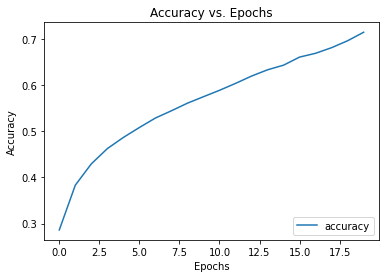

In [ ]:
plt.plot(train_loss_accuracy.history['accuracy'], label='accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

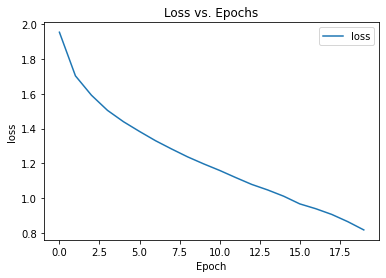

In [ ]:
plt.plot(train_loss_accuracy.history['loss'], label = 'loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(loc='upper right')
plt.show()

In [ ]:
# Compile and train the model, where the number of epoch is 5, which is very standard choice
# also the learning rate is 0.001  
model = LeNet_cnn_model_building()
# Define the optimizer and the learning rate 
optimizer_and_learning_rate=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    optimizer=optimizer_and_learning_rate,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
keras.layers.Flatten(input_shape=(32, 32,3)) # (input_shape=(1= no of ,32, 32,1 ))
train_loss_accuracy= model.fit(x_train, y_train, batch_size=128, epochs=20)

Epoch 1/20
391/391 [==============================] - 3s 5ms/step - loss: 1.9115 - accuracy: 0.2919
Epoch 2/20
391/391 [==============================] - 2s 5ms/step - loss: 1.6613 - accuracy: 0.3926
Epoch 3/20
391/391 [==============================] - 2s 6ms/step - loss: 1.5514 - accuracy: 0.4336
Epoch 4/20
391/391 [==============================] - 3s 6ms/step - loss: 1.4677 - accuracy: 0.4696
Epoch 5/20
391/391 [==============================] - 2s 5ms/step - loss: 1.3954 - accuracy: 0.4988
Epoch 6/20
391/391 [==============================] - 2s 5ms/step - loss: 1.3417 - accuracy: 0.5180
Epoch 7/20
391/391 [==============================] - 2s 5ms/step - loss: 1.2846 - accuracy: 0.5365
Epoch 8/20
391/391 [==============================] - 2s 5ms/step - loss: 1.2319 - accuracy: 0.5578
Epoch 9/20
391/391 [==============================] - 2s 5ms/step - loss: 1.1804 - accuracy: 0.5765
Epoch 10/20
391/391 [==============================] - 2s 5ms/step - loss: 1.1315 - accuracy: 0.5961

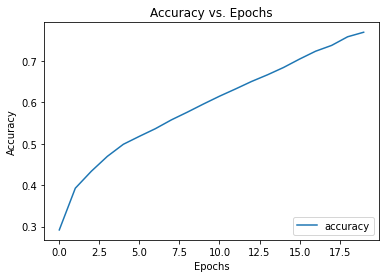

In [ ]:
plt.plot(train_loss_accuracy.history['accuracy'], label='accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

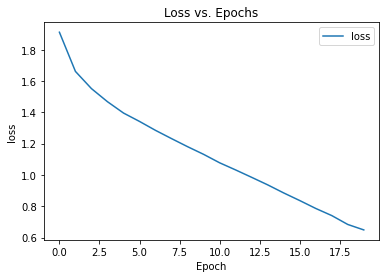

In [ ]:
plt.plot(train_loss_accuracy.history['loss'], label = 'loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(loc='upper right')
plt.show()

In [ ]:
# Compile and train the model, where the number of epoch is 5, which is very standard choice
# also the learning rate is 0.001  
model = LeNet_cnn_model_building()
# Define the optimizer and the learning rate 
optimizer_and_learning_rate=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    optimizer=optimizer_and_learning_rate,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
keras.layers.Flatten(input_shape=(32, 32,3)) # (input_shape=(1=no.batch,32, 32,1=no of channel))
train_loss_accuracy= model.fit(x_train, y_train, batch_size=128, epochs=25)

Epoch 1/25
391/391 [==============================] - 2s 5ms/step - loss: 1.9065 - accuracy: 0.2954
Epoch 2/25
391/391 [==============================] - 2s 5ms/step - loss: 1.6534 - accuracy: 0.3985
Epoch 3/25
391/391 [==============================] - 2s 5ms/step - loss: 1.5328 - accuracy: 0.4492
Epoch 4/25
391/391 [==============================] - 2s 5ms/step - loss: 1.4298 - accuracy: 0.4889
Epoch 5/25
391/391 [==============================] - 2s 5ms/step - loss: 1.3493 - accuracy: 0.5185
Epoch 6/25
391/391 [==============================] - 2s 5ms/step - loss: 1.2868 - accuracy: 0.5423
Epoch 7/25
391/391 [==============================] - 2s 5ms/step - loss: 1.2286 - accuracy: 0.5633
Epoch 8/25
391/391 [==============================] - 2s 5ms/step - loss: 1.1708 - accuracy: 0.5819
Epoch 9/25
391/391 [==============================] - 2s 5ms/step - loss: 1.1220 - accuracy: 0.6018
Epoch 10/25
391/391 [==============================] - 2s 5ms/step - loss: 1.0713 - accuracy: 0.6191

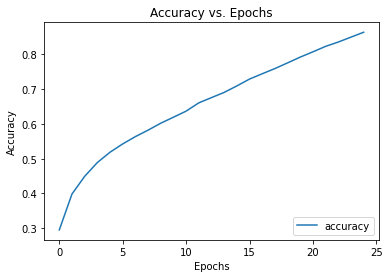

In [ ]:
plt.plot(train_loss_accuracy.history['accuracy'], label='accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

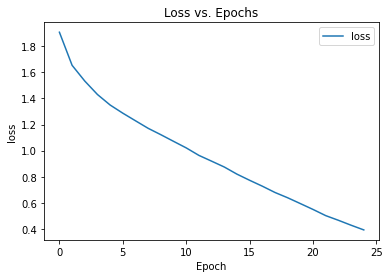

In [ ]:
plt.plot(train_loss_accuracy.history['loss'], label = 'loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(loc='upper right')
plt.show()

In [ ]:
# Compile and train the model, where the number of epoch is 5, which is very standard choice
# also the learning rate is 0.001  
model = LeNet_cnn_model_building()
# Define the optimizer and the learning rate 
optimizer_and_learning_rate=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    optimizer=optimizer_and_learning_rate,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
keras.layers.Flatten(input_shape=(32, 32,3)) # (input_shape=(1=no.batch,32, 32,1=no of channel))
train_loss_accuracy= model.fit(x_train, y_train, batch_size=64, epochs=25)

Epoch 1/25
782/782 [==============================] - 4s 4ms/step - loss: 1.8393 - accuracy: 0.3230
Epoch 2/25
782/782 [==============================] - 3s 4ms/step - loss: 1.5694 - accuracy: 0.4350
Epoch 3/25
782/782 [==============================] - 3s 4ms/step - loss: 1.4329 - accuracy: 0.4879
Epoch 4/25
782/782 [==============================] - 3s 4ms/step - loss: 1.3366 - accuracy: 0.5256
Epoch 5/25
782/782 [==============================] - 3s 4ms/step - loss: 1.2549 - accuracy: 0.5548
Epoch 6/25
782/782 [==============================] - 3s 4ms/step - loss: 1.1773 - accuracy: 0.5833
Epoch 7/25
782/782 [==============================] - 3s 4ms/step - loss: 1.1072 - accuracy: 0.6088
Epoch 8/25
782/782 [==============================] - 3s 4ms/step - loss: 1.0428 - accuracy: 0.6328
Epoch 9/25
782/782 [==============================] - 3s 4ms/step - loss: 0.9724 - accuracy: 0.6554
Epoch 10/25
782/782 [==============================] - 3s 4ms/step - loss: 0.9098 - accuracy: 0.6794

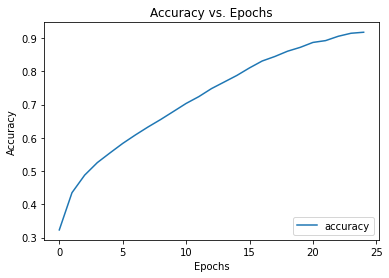

In [ ]:
plt.plot(train_loss_accuracy.history['accuracy'], label='accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

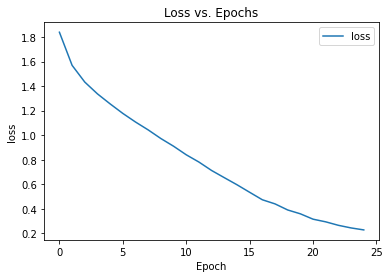

In [ ]:
plt.plot(train_loss_accuracy.history['loss'], label = 'loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(loc='upper right')
plt.show()

# Conclusion: 

# Normalization Process 2 Conclusin: 

Since the batch size is 64 and the epochs=25 give us better accuracy 0.9596 compared to others, we compare the different learning rates.  

# Normalization Process 3 Conclusin: 
Since the batch size is 64 and the epochs=25 give us better accuracy 0.9179 compared to others, we compare the different learning rates.  

# Remark: Perhaps, I talked to professor he loved to see the normalization process 3, so I re run the code and chaged accordingly. I would loke to use normalize process 3 here in the following. 

# Problem 2- Part 1: 

We now find the effect of learning rate on the training process and also find which performed best. 

# Using the Normalization 3: 

In [ ]:
# Compile and train the model, where the number of epoch is 5, which is very standard choice
# Define the learning rates
learning_Rate=[0.001, 0.005, 0.01, 0.05, 0.1]
acc_wrt_diff_lern=np.zeros(len(learning_Rate))
test_loss = np.zeros(len(learning_Rate))
test_acc = np.zeros(len(learning_Rate))
for i in range (len(learning_Rate)):
  model = LeNet_cnn_model_building()
  optimizer_and_learning_rate=tf.keras.optimizers.Adam(learning_rate=learning_Rate[i])
  model.compile(
    optimizer=optimizer_and_learning_rate,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
  keras.layers.Flatten(input_shape=(32, 32,3))
  train_loss_accuracy= model.fit(x_train,  y_train, batch_size=64, epochs=25)
  acc_wrt_diff_lern[i]=train_loss_accuracy.history['accuracy'][4]
  model.summary()
  test_loss[i], test_acc[i] = model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/25
782/782 [==============================] - 5s 5ms/step - loss: 1.8450 - accuracy: 0.3179
Epoch 2/25
782/782 [==============================] - 3s 4ms/step - loss: 1.5777 - accuracy: 0.4290
Epoch 3/25
782/782 [==============================] - 3s 4ms/step - loss: 1.4475 - accuracy: 0.4808
Epoch 4/25
782/782 [==============================] - 3s 4ms/step - loss: 1.3488 - accuracy: 0.5162
Epoch 5/25
782/782 [==============================] - 3s 4ms/step - loss: 1.2737 - accuracy: 0.5456
Epoch 6/25
782/782 [==============================] - 3s 4ms/step - loss: 1.2070 - accuracy: 0.5687
Epoch 7/25
782/782 [==============================] - 3s 4ms/step - loss: 1.1409 - accuracy: 0.5931
Epoch 8/25
782/782 [==============================] - 4s 5ms/step - loss: 1.0691 - accuracy: 0.6183
Epoch 9/25
782/782 [==============================] - 4s 5ms/step - loss: 1.0082 - accuracy: 0.6403
Epoch 10/25
782/782 [==============================] - 5s 7ms/step - loss: 0.9422 - accuracy: 0.6652

# Accuary and Loss vs. Learning rate Using Normal Process 3:

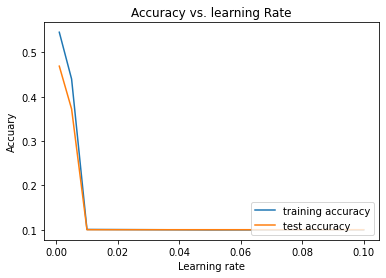

The learning rates are  [0.001, 0.005, 0.01, 0.05, 0.1]
The acccuary in each learning rates are  [0.54563999 0.44005999 0.1006     0.09954    0.09964   ]
Test accuracy is [0.4691 0.3725 0.1    0.1    0.1   ]


In [ ]:
plt.plot(learning_Rate,acc_wrt_diff_lern, label='training accuracy')
plt.xlabel('Learning rate')
plt.ylabel('Accuary')
plt.plot(learning_Rate,test_acc, label='test accuracy')
plt.title('Accuracy vs. learning Rate')
plt.legend(loc='lower right')
plt.show()
print('The learning rates are ',learning_Rate)
print('The acccuary in each learning rates are ',acc_wrt_diff_lern)
print('Test accuracy is', test_acc)

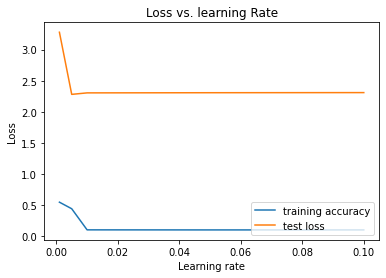

The learning rates are  [0.001, 0.005, 0.01, 0.05, 0.1]
Test losss is [3.27867341 2.27955008 2.30349207 2.30605698 2.30796766]


In [ ]:
plt.plot(learning_Rate,acc_wrt_diff_lern, label='training accuracy')
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.plot(learning_Rate,test_loss,label='test loss')
plt.title('Loss vs. learning Rate')
plt.legend(loc='lower right')
plt.show()
print('The learning rates are ',learning_Rate)
print('Test losss is', test_loss)

# Using the Normalization 2: 

In [ ]:
# Compile and train the model, where the number of epoch is 5, which is very standard choice
# Define the learning rates
learning_Rate=[0.001, 0.005, 0.01, 0.05, 0.1]
acc_wrt_diff_lern=np.zeros(len(learning_Rate))
test_loss = np.zeros(len(learning_Rate))
test_acc = np.zeros(len(learning_Rate))
for i in range (len(learning_Rate)):
  model = LeNet_cnn_model_building()
  optimizer_and_learning_rate=tf.keras.optimizers.Adam(learning_rate=learning_Rate[i])
  model.compile(
    optimizer=optimizer_and_learning_rate,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
  keras.layers.Flatten(input_shape=(1,32, 32,1))
  train_loss_accuracy= model.fit(x_train,  y_train, batch_size=64, epochs=25)
  acc_wrt_diff_lern[i]=train_loss_accuracy.history['accuracy'][4]
  model.summary()
  test_loss[i], test_acc[i] = model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/25
782/782 [==============================] - 11s 4ms/step - loss: 1.6454 - accuracy: 0.4093
Epoch 2/25
782/782 [==============================] - 3s 4ms/step - loss: 1.2883 - accuracy: 0.5468
Epoch 3/25
782/782 [==============================] - 3s 4ms/step - loss: 1.1271 - accuracy: 0.6045
Epoch 4/25
782/782 [==============================] - 3s 4ms/step - loss: 1.0054 - accuracy: 0.6509
Epoch 5/25
782/782 [==============================] - 3s 4ms/step - loss: 0.9100 - accuracy: 0.6814
Epoch 6/25
782/782 [==============================] - 3s 4ms/step - loss: 0.8315 - accuracy: 0.7110
Epoch 7/25
782/782 [==============================] - 3s 4ms/step - loss: 0.7632 - accuracy: 0.7325
Epoch 8/25
782/782 [==============================] - 3s 4ms/step - loss: 0.6919 - accuracy: 0.7585
Epoch 9/25
782/782 [==============================] - 3s 4ms/step - loss: 0.6315 - accuracy: 0.7784
Epoch 10/25
782/782 [==============================] - 3s 4ms/step - loss: 0.5687 - accuracy: 0.800

# Accuary and Loss vs. Learning rate Using Normal Process 3: 

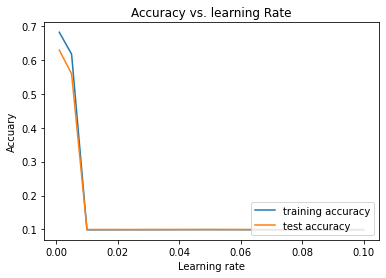

The learning rates are  [0.001, 0.005, 0.01, 0.05, 0.1]
The acccuary in each learning rates are  [0.68142003 0.61690003 0.09908    0.09954    0.09876   ]
Test accuracy is [0.62889999 0.55870003 0.1        0.1        0.1       ]


In [ ]:
plt.plot(learning_Rate,acc_wrt_diff_lern, label='training accuracy')
plt.xlabel('Learning rate')
plt.ylabel('Accuary')
plt.plot(learning_Rate,test_acc, label='test accuracy')
plt.title('Accuracy vs. learning Rate')
plt.legend(loc='lower right')
plt.show()
print('The learning rates are ',learning_Rate)
print('The acccuary in each learning rates are ',acc_wrt_diff_lern)
print('Test accuracy is', test_acc)

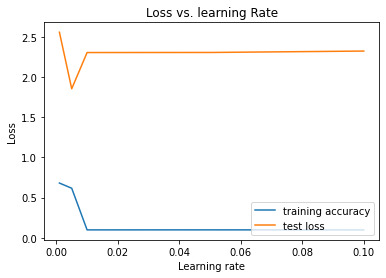

The learning rates are  [0.001, 0.005, 0.01, 0.05, 0.1]
Test losss is [2.55656886 1.85360432 2.30428171 2.30506849 2.32252121]


In [ ]:
plt.plot(learning_Rate,acc_wrt_diff_lern, label='training accuracy')
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.plot(learning_Rate,test_loss,label='test loss')
plt.title('Loss vs. learning Rate')
plt.legend(loc='lower right')
plt.show()
print('The learning rates are ',learning_Rate)
print('Test losss is', test_loss)

# Conclusion (Problem 2- Part 1): 
In the training process, a learning rate of 0.001 gives us the best accuracy of 0.68142003 using the optimizer 'adam' with the batch size 64, epochs 25 from the learning rates [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1] using the LeNet convolutional Neural Network model


Normalization process 3 shows that a learning rate of 0.001 shows better accuracy 0.54563999. On the contrary, the normalization process 2 shows that a learning rate of 0.001 shows better accuracy 0.54563999. 

# Problem 2- Part 2: 
We now find the effect of batch size on the training process and find which performed best. We therefore consider different batch sizes. 

# Using the Normalization Process 3

In [ ]:
# Define the Different Batch sizes
batch_size=[50, 100, 150, 256, 512]
acc_wrt_diff_lern=np.zeros(len(batch_size))
test_loss = np.zeros(len(batch_size))
test_acc = np.zeros(len(batch_size))
for i in range (len(batch_size)):
  model= LeNet_cnn_model_building()
  model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
  keras.layers.Flatten(input_shape=(32, 32,3))
  train_loss_accuracy= model.fit(x_train, y_train, batch_size=batch_size[i], epochs=25)
  acc_wrt_diff_lern[i]=train_loss_accuracy.history['accuracy'][4]
  model.summary()
  test_loss[i], test_acc[i] = model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/25
1000/1000 [==============================] - 4s 4ms/step - loss: 1.8355 - accuracy: 0.3257
Epoch 2/25
1000/1000 [==============================] - 4s 4ms/step - loss: 1.5679 - accuracy: 0.4340
Epoch 3/25
1000/1000 [==============================] - 4s 4ms/step - loss: 1.4310 - accuracy: 0.4843
Epoch 4/25
1000/1000 [==============================] - 4s 4ms/step - loss: 1.3329 - accuracy: 0.5229
Epoch 5/25
1000/1000 [==============================] - 4s 4ms/step - loss: 1.2545 - accuracy: 0.5527
Epoch 6/25
1000/1000 [==============================] - 4s 4ms/step - loss: 1.1779 - accuracy: 0.5808
Epoch 7/25
1000/1000 [==============================] - 4s 4ms/step - loss: 1.1057 - accuracy: 0.6048
Epoch 8/25
1000/1000 [==============================] - 4s 4ms/step - loss: 1.0376 - accuracy: 0.6281
Epoch 9/25
1000/1000 [==============================] - 4s 4ms/step - loss: 0.9706 - accuracy: 0.6558
Epoch 10/25
1000/1000 [==============================] - 4s 4ms/step - loss: 0.899

# Accuary and Loss vs. Different batch sizes Normalize Process 3

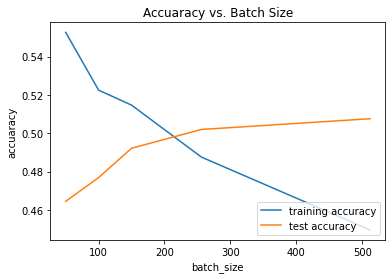

Batch size is [50, 100, 150, 256, 512]
Train accuracy is [0.55268002 0.52252001 0.5147     0.4876     0.44953999]
Test accuracy is [0.46450001 0.47690001 0.49219999 0.50199997 0.50760001]
Test losss is [3.56075549 2.54473448 2.27154589 1.81116939 1.46257508]


In [ ]:
plt.plot(batch_size,acc_wrt_diff_lern, label='training accuracy')
plt.xlabel('batch_size')
plt.ylabel('accuaracy')
plt.plot(batch_size,test_acc, label='test accuracy')
plt.title('Accuaracy vs. Batch Size')
plt.legend(loc='lower right')
plt.show()
print('Batch size is', batch_size)
print('Train accuracy is', acc_wrt_diff_lern)
print('Test accuracy is', test_acc)
print('Test losss is', test_loss)

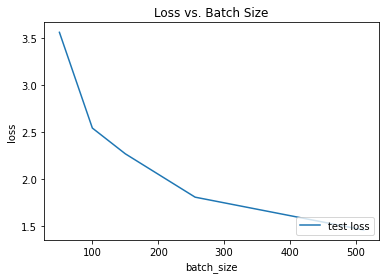

Test losss is [3.56075549 2.54473448 2.27154589 1.81116939 1.46257508]


In [ ]:
plt.plot(batch_size,test_loss,label='test loss')
plt.xlabel('batch_size')
plt.ylabel('loss')
plt.title('Loss vs. Batch Size')
plt.legend(loc='lower right')
plt.show()
print('Test losss is', test_loss)

# Using the Normalization Process 2

In [ ]:
# Define the Different Batch sizes
batch_size=[50, 100, 150, 256, 512]
acc_wrt_diff_lern=np.zeros(len(batch_size))
test_loss = np.zeros(len(batch_size))
test_acc = np.zeros(len(batch_size))
for i in range (len(batch_size)):
  model= LeNet_cnn_model_building()
  model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
  keras.layers.Flatten(input_shape=(1,32, 32,1))
  train_loss_accuracy= model.fit(x_train, y_train, batch_size=batch_size[i], epochs=25)
  acc_wrt_diff_lern[i]=train_loss_accuracy.history['accuracy'][4]
  model.summary()
  test_loss[i], test_acc[i] = model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/25
1000/1000 [==============================] - 4s 4ms/step - loss: 1.6149 - accuracy: 0.4192
Epoch 2/25
1000/1000 [==============================] - 4s 4ms/step - loss: 1.2869 - accuracy: 0.5434
Epoch 3/25
1000/1000 [==============================] - 4s 4ms/step - loss: 1.1346 - accuracy: 0.6009
Epoch 4/25
1000/1000 [==============================] - 4s 4ms/step - loss: 1.0305 - accuracy: 0.6408
Epoch 5/25
1000/1000 [==============================] - 4s 4ms/step - loss: 0.9399 - accuracy: 0.6705
Epoch 6/25
1000/1000 [==============================] - 4s 4ms/step - loss: 0.8598 - accuracy: 0.7002
Epoch 7/25
1000/1000 [==============================] - 4s 4ms/step - loss: 0.7892 - accuracy: 0.7226
Epoch 8/25
1000/1000 [==============================] - 4s 4ms/step - loss: 0.7166 - accuracy: 0.7488
Epoch 9/25
1000/1000 [==============================] - 4s 4ms/step - loss: 0.6444 - accuracy: 0.7737
Epoch 10/25
1000/1000 [==============================] - 4s 4ms/step - loss: 0.583

# Accuary and Loss vs. Different batch sizes Normalize Process 2

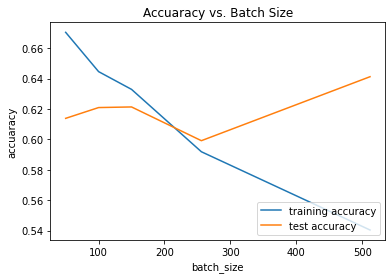

Batch size is [50, 100, 150, 256, 512]
Train accuracy is [0.67049998 0.64464003 0.63296002 0.59192002 0.54042   ]
Test accuracy is [0.61390001 0.62099999 0.6214     0.59920001 0.64130002]
Test losss is [2.77333784 2.31585813 1.96137071 1.81830823 1.17018104]


In [ ]:
plt.plot(batch_size,acc_wrt_diff_lern, label='training accuracy')
plt.xlabel('batch_size')
plt.ylabel('accuaracy')
plt.plot(batch_size,test_acc, label='test accuracy')
plt.title('Accuaracy vs. Batch Size')
plt.legend(loc='lower right')
plt.show()
print('Batch size is', batch_size)
print('Train accuracy is', acc_wrt_diff_lern)
print('Test accuracy is', test_acc)
print('Test losss is', test_loss)

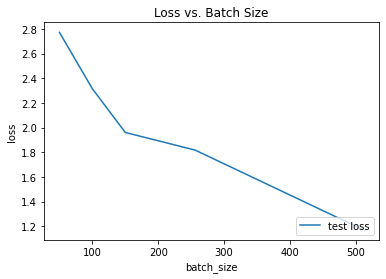

Test losss is [2.77333784 2.31585813 1.96137071 1.81830823 1.17018104]


In [ ]:
plt.plot(batch_size,test_loss,label='test loss')
plt.xlabel('batch_size')
plt.ylabel('loss')
plt.title('Loss vs. Batch Size')
plt.legend(loc='lower right')
plt.show()
print('Test losss is', test_loss)

# Conclusion:

**Normalization process 3** shows that a batch size of 50 gives better accuracy 0.55268002 among the Batch size [50, 100, 150, 256, 512]. On the contrary, the **normalization process 2** shows that batch size 50 gives the best accuracy from the same set of batch sizes with accuracy 0.6704998. 

In the training process of **normalization process 2**, the batch size 50 gives the best accuracy of 0.6704998 using the optimizer 'adam'  among the batch_size=[50, 100, 150, 256, 512] using the LeNet convolutional Neural Network model, where the learning rate is 0.001. Moreover, the training accuracy is decressing when the batch size increases. On the contrary, test data accuracy is approximately the opposite concerning batch size. 



# Problem 2- Part 3: 
We now try different hyperparameters to obtain the best accuracy on the test set. We also find the best performance by changing the hyperparameters.

Since the LeNet convolutional Neural Network model is fixed, we will not change any layers of data, e.g., no layers, shape, e.t.c. We will only change the other hyperparameters, for example, learning rates, batch sizes, and optimizers.  

# Normalization Process 3: 

In [ ]:
# The first two layers with 28 filters of window size fxf
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)
NoLyr=[6, 16, 120] # this is given to define LeNet Convolutional Neural Network
nclasses=10
f=5 # this is also given 
def LeNet_cnn_model_building():
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Conv2D(NoLyr[0],(f,f),strides=(1,1),padding='same',activation='relu')) # padding='same' means with zero padding
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
  model.add(tf.keras.layers.Conv2D(NoLyr[1],(f,f),strides=(2,2),padding='same',activation='relu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
  model.add(tf.keras.layers.Conv2D(NoLyr[2],(f,f),padding='same',activation='relu'))
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(84))
  model.add(tf.keras.layers.Activation('relu'))
  model.add(tf.keras.layers.Dense(nclasses))
  model.add(tf.keras.layers.Activation('softmax'))
  return model

In [ ]:
# Compile and train the model, where the number of epoch is 5, which is very standard choice
# also the learning rate is 0.001  
model = LeNet_cnn_model_building()
# Define the optimizer and the learning rate 
optimizer_and_learning_rate=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    optimizer=optimizer_and_learning_rate,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
keras.layers.Flatten(input_shape=(32, 32,3)) # chaged from problem 1: keras.layers.Flatten(input_shape=(1,32, 32,1))
train_loss_accuracy= model.fit(x_train, y_train, batch_size=64, epochs=25)

Epoch 1/25
782/782 [==============================] - 4s 5ms/step - loss: 1.8630 - accuracy: 0.3192
Epoch 2/25
782/782 [==============================] - 4s 5ms/step - loss: 1.5843 - accuracy: 0.4294
Epoch 3/25
782/782 [==============================] - 3s 4ms/step - loss: 1.4411 - accuracy: 0.4816
Epoch 4/25
782/782 [==============================] - 3s 4ms/step - loss: 1.3381 - accuracy: 0.5230
Epoch 5/25
782/782 [==============================] - 3s 4ms/step - loss: 1.2527 - accuracy: 0.5515
Epoch 6/25
782/782 [==============================] - 3s 4ms/step - loss: 1.1804 - accuracy: 0.5794
Epoch 7/25
782/782 [==============================] - 3s 4ms/step - loss: 1.1137 - accuracy: 0.6062
Epoch 8/25
782/782 [==============================] - 3s 4ms/step - loss: 1.0398 - accuracy: 0.6288
Epoch 9/25
782/782 [==============================] - 3s 4ms/step - loss: 0.9746 - accuracy: 0.6522
Epoch 10/25
782/782 [==============================] - 3s 4ms/step - loss: 0.9098 - accuracy: 0.6771

We now try different hyperparameters to obtain the best accuracy using different batch sizes and learning rate. We use the **'Adam' optimizer.** 

In [ ]:
# Define the Different Batch sizes
batch_size=[50, 100, 150, 256, 512]
# Define the learning rates
learning_Rate=[0.001, 0.005, 0.01, 0.05, 0.1]
for i in range(len(batch_size)):
  for j in range(len(learning_Rate)):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(NoLyr[0],(f,f),strides=(1,1),padding='same',activation='relu')) # padding='same' means with zero padding
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
    model.add(tf.keras.layers.Conv2D(NoLyr[1],(f,f),strides=(2,2),padding='same',activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
    model.add(tf.keras.layers.Conv2D(NoLyr[2],(f,f),padding='same',activation='relu'))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(84))
    model.add(tf.keras.layers.Activation('relu'))
    model.add(tf.keras.layers.Dense(nclasses))
    model.add(tf.keras.layers.Activation('softmax'))
    optimizer_and_learning_rate= tf.keras.optimizers.Adam(learning_rate=learning_Rate[j]) # here I use adam optimizer with learning rate 0.001
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer_and_learning_rate, metrics=['accuracy'])
    model.build(input_shape=(1,32,32,3)) # expected min_ndim=4, so add 1
    accuracy= model.fit(x_train, y_train,batch_size=batch_size[i], epochs=25,verbose=0) 
    print(accuracy.history['accuracy'][24])

0.9075599908828735
0.5361800193786621
0.0989999994635582
0.09905999898910522
0.09814000129699707
0.9045799970626831
0.6723399758338928
0.41238000988960266
0.09904000163078308
0.09843999892473221
0.8946599960327148
0.7698000073432922
0.4408999979496002
0.09855999797582626
0.10034000128507614
0.7583600282669067


We now try different hyperparameters to obtain the best accuracy using different batch sizes and learning rate. We use the **'RMSProp' optimizer.** 

In [ ]:
from tensorflow import keras
from keras import optimizers

We now try different hyperparameters to obtain the best accuracy using different batch sizes and learning rate. We use the **'RMSProp' optimizer.** 

In [ ]:
# Define the Different Batch sizes
batch_size=[50, 100, 150, 256, 512]
# Define the learning rates
learning_Rate=[0.001, 0.005, 0.01, 0.05, 0.1]
for i in range(len(batch_size)):
  for j in range(len(learning_Rate)):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(NoLyr[0],(f,f),strides=(1,1),padding='same',activation='relu')) # padding='same' means with zero padding
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
    model.add(tf.keras.layers.Conv2D(NoLyr[1],(f,f),strides=(2,2),padding='same',activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
    model.add(tf.keras.layers.Conv2D(NoLyr[2],(f,f),padding='same',activation='relu'))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(84))
    model.add(tf.keras.layers.Activation('relu'))
    model.add(tf.keras.layers.Dense(nclasses))
    model.add(tf.keras.layers.Activation('softmax'))
    optimizer_and_learning_rate= tf.keras.optimizers.RMSprop(learning_rate=learning_Rate[j]) # here I use adam optimizer with learning rate 0.001
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer_and_learning_rate, metrics=['accuracy'])
    model.build(input_shape=(1,32,32,3)) 
    accuracy= model.fit(x_train, y_train,batch_size=batch_size[i], epochs=25,verbose=0) 
    print(accuracy.history['accuracy'][24])

0.8753200173377991
0.421860009431839
0.34046000242233276
0.10022000223398209
0.09923999756574631
0.9043200016021729
0.49149999022483826
0.3806000053882599
0.09948000311851501
0.09911999851465225
0.8718600273132324
0.699180006980896
0.42065998911857605
0.09762000292539597
0.10090000182390213
0.7935799956321716
0.796239972114563
0.49553999304771423
0.10072000324726105
0.10062000155448914
0.6784600019454956
0.8476399779319763
0.6477800011634827
0.1023000031709671
0.098860003054142


We now try different hyperparameters to obtain the best accuracy using different batch sizes and learning rate. We use the **'SGD' optimizer.** 

In [ ]:
# Define the Different Batch sizes
batch_size=[50, 100, 150, 256, 512]
# Define the learning rates
learning_Rate=[0.001, 0.005, 0.01, 0.05, 0.1]
for i in range(len(batch_size)):
  for j in range(len(learning_Rate)):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(NoLyr[0],(f,f),strides=(1,1),padding='same',activation='relu')) # padding='same' means with zero padding
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
    model.add(tf.keras.layers.Conv2D(NoLyr[1],(f,f),strides=(2,2),padding='same',activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
    model.add(tf.keras.layers.Conv2D(NoLyr[2],(f,f),padding='same',activation='relu'))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(84))
    model.add(tf.keras.layers.Activation('relu'))
    model.add(tf.keras.layers.Dense(nclasses))
    model.add(tf.keras.layers.Activation('softmax'))
    optimizer_and_learning_rate= tf.keras.optimizers.SGD(learning_rate=learning_Rate[j]) # here I use adam optimizer with learning rate 0.001
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer_and_learning_rate, metrics=['accuracy'])
    model.build(input_shape=(1,32,32,3)) 
    accuracy= model.fit(x_train, y_train,batch_size=batch_size[i], epochs=25,verbose=0) 
    print(accuracy.history['accuracy'][24])

0.3772999942302704
0.5439000129699707
0.6526399850845337
0.864359974861145
0.7775999903678894
0.2954399883747101
0.4634000062942505
0.5465999841690063
0.783840000629425
0.8282999992370605
0.29019999504089355
0.4232200086116791
0.4948599934577942
0.7213199734687805
0.8178799748420715
0.22944000363349915
0.3457399904727936
0.43852001428604126
0.6105599999427795
0.6973999738693237
0.1333400011062622
0.3016600012779236
0.34973999857902527
0.5001599788665771
0.5604599714279175


# Conclusion on the Optimizer: 
Using the normalization process 2, from the batch_size=[50, 100, 150, 256, 512] and the learning rates
learning_Rate=[0.001, 0.005, 0.01, 0.05, 0.1], we have found that the optimizer 'Adam' gives the best accuracy 0.924600051498413, where the optimizer 'RMSProp' gives the best accuracy 0.875320017337791 when the batch size is 50 and the learning rate is 0.001. On the contrary,  the optimizer 'SGD' gives us better accuracy, 0.8643599874861145 when the batch size 50 and the learning rate 0.05.  So the conclusion is the optimizer **'Adam'** gives the best accuracy among the three optimizers: **'Adam', 'RMSProp', and 'SGD'**. 


We are gonna try only optimizer ***Adam** in the following for the **Normalization Process 2**. I hope to have the same conclusion on the optimizer, i.e., **adam** will give us the better compare to **'RMSProp' and 'SGD' optimizer.**

# Using the Normalization Process 2: 

In [ ]:
# The first two layers with 28 filters of window size fxf
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)
NoLyr=[6, 16, 120] # this is given to define LeNet Convolutional Neural Network
nclasses=10
f=5 # this is also given 
def LeNet_cnn_model_building():
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Conv2D(NoLyr[0],(f,f),strides=(1,1),padding='same',activation='relu')) # padding='same' means with zero padding
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
  model.add(tf.keras.layers.Conv2D(NoLyr[1],(f,f),strides=(2,2),padding='same',activation='relu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
  model.add(tf.keras.layers.Conv2D(NoLyr[2],(f,f),padding='same',activation='relu'))
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(84))
  model.add(tf.keras.layers.Activation('relu'))
  model.add(tf.keras.layers.Dense(nclasses))
  model.add(tf.keras.layers.Activation('softmax'))
  return model

In [ ]:
# Compile and train the model, where the number of epoch is 5, which is very standard choice
# also the learning rate is 0.001  
model = LeNet_cnn_model_building()
# Define the optimizer and the learning rate 
optimizer_and_learning_rate=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    optimizer=optimizer_and_learning_rate,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
keras.layers.Flatten(input_shape=(1,32, 32,1)) # chaged from problem 1: keras.layers.Flatten(input_shape=(1,32, 32,1))
train_loss_accuracy= model.fit(x_train, y_train, batch_size=64, epochs=25)

Epoch 1/25
782/782 [==============================] - 4s 4ms/step - loss: 1.6490 - accuracy: 0.4083
Epoch 2/25
782/782 [==============================] - 3s 4ms/step - loss: 1.2780 - accuracy: 0.5451
Epoch 3/25
782/782 [==============================] - 3s 4ms/step - loss: 1.1181 - accuracy: 0.6041
Epoch 4/25
782/782 [==============================] - 5s 6ms/step - loss: 1.0069 - accuracy: 0.6491
Epoch 5/25
782/782 [==============================] - 5s 7ms/step - loss: 0.9233 - accuracy: 0.6785
Epoch 6/25
782/782 [==============================] - 6s 7ms/step - loss: 0.8470 - accuracy: 0.7044
Epoch 7/25
782/782 [==============================] - 5s 7ms/step - loss: 0.7784 - accuracy: 0.7280
Epoch 8/25
782/782 [==============================] - 6s 7ms/step - loss: 0.7104 - accuracy: 0.7532
Epoch 9/25
782/782 [==============================] - 4s 5ms/step - loss: 0.6461 - accuracy: 0.7745
Epoch 10/25
782/782 [==============================] - 3s 4ms/step - loss: 0.5867 - accuracy: 0.7939

# Let's display the architecture of our model using model sumary

In [ ]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_63 (Conv2D)          (None, 32, 32, 6)         156       
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 16, 16, 6)        0         
 g2D)                                                            
                                                                 
 conv2d_64 (Conv2D)          (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 4, 4, 16)         0         
 g2D)                                                            
                                                                 
 conv2d_65 (Conv2D)          (None, 4, 4, 120)         48120     
                                                                 
 flatten_42 (Flatten)        (None, 1920)            

We now try different hyperparameters to obtain the best accuracy using different batch sizes and learning rate. We use the **'Adam' optimizer.** 

In [ ]:
# Define the Different Batch sizes
batch_size=[50, 100, 150, 256, 512]
# Define the learning rates
learning_Rate=[0.001, 0.005, 0.01, 0.05, 0.1]
for i in range(len(batch_size)):
  for j in range(len(learning_Rate)):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(NoLyr[0],(f,f),strides=(1,1),padding='same',activation='relu')) # padding='same' means with zero padding
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
    model.add(tf.keras.layers.Conv2D(NoLyr[1],(f,f),strides=(2,2),padding='same',activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
    model.add(tf.keras.layers.Conv2D(NoLyr[2],(f,f),padding='same',activation='relu'))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(84))
    model.add(tf.keras.layers.Activation('relu'))
    model.add(tf.keras.layers.Dense(nclasses))
    model.add(tf.keras.layers.Activation('softmax'))
    optimizer_and_learning_rate= tf.keras.optimizers.Adam(learning_rate=learning_Rate[j]) # here I use adam optimizer with learning rate 0.001
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer_and_learning_rate, metrics=['accuracy'])
    model.build(input_shape=(1,32,32,1)) 
    accuracy= model.fit(x_train, y_train,batch_size=batch_size[i], epochs=25,verbose=0) 
    print(accuracy.history['accuracy'][24])

0.9557600021362305
0.7148799896240234
0.5362600088119507
0.09662000089883804
0.1008400022983551
0.9515200257301331
0.8839600086212158
0.09793999791145325
0.09815999865531921
0.09798000007867813
0.9343600273132324
0.8475199937820435
0.5436199903488159
0.09811999648809433
0.09939999878406525
0.9089000225067139
0.9229400157928467
0.727840006351471
0.10100000351667404
0.09811999648809433
0.7917199730873108
0.9210600256919861
0.09842000156641006
0.1004600003361702
0.098860003054142


# Conclusion: 

Using the **normalization process 2**, from the batch_size=[50, 100, 150, 256, 512] and the learning rates
learning_Rate=[0.001, 0.005, 0.01, 0.05, 0.1], we have found that batch_size 50 and learning_Rate 0.001 gives the best accuracy 0.9557600021362305. 

On the contrary, **using the normalization process 3**, from the batch_size=[50, 100, 150, 256, 512] and the learning rates
learning_Rate=[0.001, 0.005, 0.01, 0.05, 0.1], we have found that batch_size 50 and learning_Rate 0.001 gives the best accuracy 0.9246000051498413. 

We are not gonna try any more optimizers as we have seen them earlier using the **Normalization Process 2**. I hope to have the same conclusion on the optimizer, i.e., **adam** will give us the better compare to **'RMSProp' and 'SGD' optimizer.** 

# Problem 2- Part 4: 
We now implement an equivalent feed forward network for the same task with each hidden layer
containing the same number of neurons as the number of filters in each convolution layer.
Use the ‘Adam’ optimizer to train your network on the CIFAR-10 dataset for a fixed set of
25 epochs. Compare its performance with your LeNet implementation based on the
following questions:

a. What is its performance?

b. How many parameters are there in this network compared to the LeNet implementation? Are they worth it?

# Normalization Process 3: 


# Implement the LeNet Convolutional Neural Network  

LetNet Code run when the batch_size=64, epochs=25

In [ ]:
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)
NoLyr=[6, 16, 120] # this is given to define LeNet Convolutional Neural Network
nclasses=10
f=5 # this is also given 
def LeNet_cnn_model_building():
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Conv2D(NoLyr[0],(f,f),strides=(1,1),padding='same',activation='relu')) # padding='same' means with zero padding
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
  model.add(tf.keras.layers.Conv2D(NoLyr[1],(f,f),strides=(2,2),padding='same',activation='relu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
  model.add(tf.keras.layers.Conv2D(NoLyr[2],(f,f),padding='same',activation='relu'))
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(84))
  model.add(tf.keras.layers.Activation('relu'))
  model.add(tf.keras.layers.Dense(nclasses))
  model.add(tf.keras.layers.Activation('softmax'))
  return model

In [ ]:
# Compile and train the model, where the number of epoch is 5, which is very standard choice
# also the learning rate is 0.001  
model = LeNet_cnn_model_building()
# Define the optimizer and the learning rate 
optimizer_and_learning_rate=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    optimizer=optimizer_and_learning_rate,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
keras.layers.Flatten(input_shape=(1,32, 32,3)) # (input_shape=(1=no.batch,32, 32,1=no of channel))
train_loss_accuracy= model.fit(x_train, y_train, batch_size=64, epochs=25)

Epoch 1/25
782/782 [==============================] - 5s 5ms/step - loss: 1.8505 - accuracy: 0.3213
Epoch 2/25
782/782 [==============================] - 3s 4ms/step - loss: 1.5714 - accuracy: 0.4345
Epoch 3/25
782/782 [==============================] - 3s 4ms/step - loss: 1.4449 - accuracy: 0.4788
Epoch 4/25
782/782 [==============================] - 3s 4ms/step - loss: 1.3436 - accuracy: 0.5161
Epoch 5/25
782/782 [==============================] - 3s 4ms/step - loss: 1.2624 - accuracy: 0.5484
Epoch 6/25
782/782 [==============================] - 3s 4ms/step - loss: 1.1850 - accuracy: 0.5760
Epoch 7/25
782/782 [==============================] - 3s 4ms/step - loss: 1.1065 - accuracy: 0.6052
Epoch 8/25
782/782 [==============================] - 3s 4ms/step - loss: 1.0350 - accuracy: 0.6312
Epoch 9/25
782/782 [==============================] - 3s 4ms/step - loss: 0.9651 - accuracy: 0.6564
Epoch 10/25
782/782 [==============================] - 3s 4ms/step - loss: 0.8843 - accuracy: 0.6845

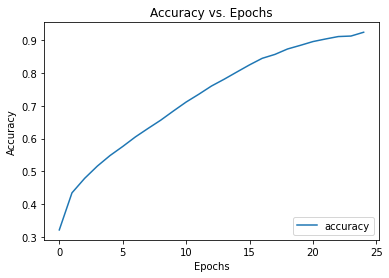

In [ ]:
plt.plot(train_loss_accuracy.history['accuracy'], label='accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

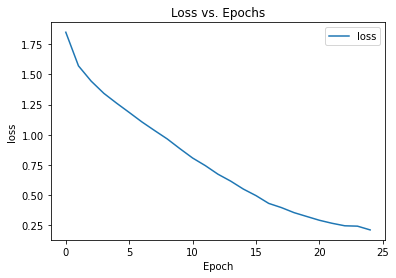

In [ ]:
plt.plot(train_loss_accuracy.history['loss'], label = 'loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(loc='upper right')
plt.show()

In [ ]:
model.summary()
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

Model: "sequential_54"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_150 (Conv2D)         (None, 32, 32, 6)         456       
                                                                 
 max_pooling2d_100 (MaxPooli  (None, 16, 16, 6)        0         
 ng2D)                                                           
                                                                 
 conv2d_151 (Conv2D)         (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_101 (MaxPooli  (None, 4, 4, 16)         0         
 ng2D)                                                           
                                                                 
 conv2d_152 (Conv2D)         (None, 4, 4, 120)         48120     
                                                                 
 flatten_55 (Flatten)        (None, 1920)            

In [ ]:
print('The test acc using LeNet model',test_acc)
print('The test loss using LeNet model',test_loss)

The test acc using LeNet model 0.46389999985694885
The test loss using LeNet model 3.6808695793151855


#  Feed forward model Development

In [ ]:
# The first two layers with 28 filters of window size fxf
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)
nclasses=10
def LeNet_Feed_Forward_model_building():
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(6)) #  6 convolution kernels
  model.add(tf.keras.layers.Activation('relu'))
  model.add(tf.keras.layers.Dense(16)) #  16 convolution kernels
  model.add(tf.keras.layers.Activation('relu'))
  model.add(tf.keras.layers.Dense(120)) #  120 convolution kernels
  model.add(tf.keras.layers.Activation('relu'))
  model.add(tf.keras.layers.Dense(nclasses))
  model.add(tf.keras.layers.Activation('softmax'))
  model.build(input_shape=(1,32,32,3))
  model.summary()
  optimizer_and_learning_rate= tf.keras.optimizers.Adam(learning_rate=0.001) # here I use adam optimizer with learning rate 0.001
  model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer_and_learning_rate, metrics=['accuracy'])
  accuracy= model.fit(x_train, y_train,batch_size=64, epochs=25,verbose=0) 
  print(accuracy.history['accuracy'][24])
  return model

In [ ]:
# Compile and train the model, where the number of epoch is 5, which is very standard choice
# also the learning rate is 0.001  
model = LeNet_Feed_Forward_model_building()
# Define the optimizer and the learning rate 
optimizer_and_learning_rate=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    optimizer=optimizer_and_learning_rate,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
keras.layers.Flatten(input_shape=(1,32,32,3)) # (input_shape=(1=no.batch,32, 32,1=no of channel))
train_loss_accuracy= model.fit(x_train, y_train, batch_size=64, epochs=25)

Model: "sequential_59"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_63 (Flatten)        (1, 3072)                 0         
                                                                 
 dense_134 (Dense)           (1, 6)                    18438     
                                                                 
 activation_134 (Activation)  (1, 6)                   0         
                                                                 
 dense_135 (Dense)           (1, 16)                   112       
                                                                 
 activation_135 (Activation)  (1, 16)                  0         
                                                                 
 dense_136 (Dense)           (1, 120)                  2040      
                                                                 
 activation_136 (Activation)  (1, 120)               

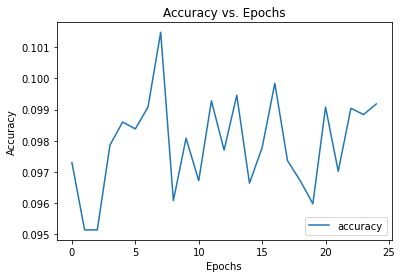

In [ ]:
plt.plot(train_loss_accuracy.history['accuracy'], label='accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

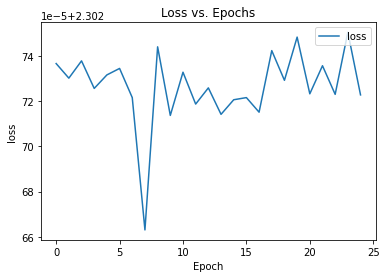

In [ ]:
plt.plot(train_loss_accuracy.history['loss'], label = 'loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(loc='upper right')
plt.show()

In [ ]:
model.summary()
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

Model: "sequential_59"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_63 (Flatten)        (None, 3072)              0         
                                                                 
 dense_134 (Dense)           (None, 6)                 18438     
                                                                 
 activation_134 (Activation)  (None, 6)                0         
                                                                 
 dense_135 (Dense)           (None, 16)                112       
                                                                 
 activation_135 (Activation)  (None, 16)               0         
                                                                 
 dense_136 (Dense)           (None, 120)               2040      
                                                                 
 activation_136 (Activation)  (None, 120)            

In [ ]:
print('The test accuracy using Feed forward model',test_acc)
print('The test loss using Feed forward model',test_loss)

The test accuracy using Feed forward model 0.10000000149011612
The test loss using Feed forward model 2.3026137351989746


# Conclusion: 

# Using Normalization Process 3 Conclusion: 
Consider the batch size is 64 and the epochs=25.

We have implemented a feed forward network for the same task of LeNet with the same convolutional kernel 6, 16, and 120 . 

When the batch_size=64, epochs=25, the LeNet Convolutional networks training accuarcy 0.9179 at the 25th epoch, where accuracy is 0.0992 at the 25th epoch in the feed forward model. This also super clear that the  feed forward network's accuracy and LetNet accuarcy have huge differencve in each epochs.  

(a)  feed forward network's test accuacy and loss: 

The test loss using Feed forward model is 0.10000000149011612
The test loss using Feed forward model is 2.3026137351989746

LeNet Convolutional Neural Network's  test accuacy and loss: 
The test accuracy using Feed forward model is 0.4638999985694885
The test loss using Feed forward model is 3.6808695793151855

(b) The number of parameters in feed forward network is-
Total params: 21,800 
Trainable params: 21,800 
Non-trainable params: 0

The number of parameters in LeNet Convolutional Neural Network is-
Total params: 213,206 
Trainable params: 213,206 
Non-trainable params: 0

Number of parameters in LeNet Convolutional Neural Network are more than the feed forward neural network.

# Problem 3

Consider the below matrices as input (X) and convolutional kernel f. Consider that the depth of
the input is 1.

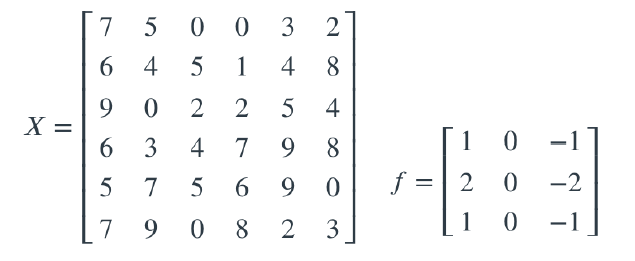


Compute the following:

1. What are the dimensions of the input and the kernel (or filter)? How many parameters
are there in the kernel f? [2 points]

2. What is the output activation map when you apply the convolutional operation using the
filter f on the input X without padding? [4 points]

3. What is the output when you apply a max-pooling operation on the output from the
previous question? [4 points]

Note: For parts 2 and 3 in question 3, please provide the actual output. You can work this one
out by hand or write your own code to do it. Provide documentation of how you got the outputs.

# Problem 3- Part 1: 

Given that the depth of the input is 1, so dimension $W_1 \times H_1 \times 1$. As the $X$ matrix size is $6 \times 6$, so the input dimension is $6 \times 6 \times 1$. Moreover, $f$ is $3 \times 3$, so the kernal (or filter) is $3 \times 3$. 

Number of parameters in the kernel = (shape of width of the filter $\times$ shape of the height of filter $\times$ number of filters in previous layer)+1$= (3 \times 3 \times \times 1)+1=10$.

# Problem 3- Part 2:

We consider the matrices as input (X) and convolutional kernel f. We also consider that the depth of
the input is 1. 

# Output activation map
We first find the output activation size using the convolutional operation of the
filter f on the input X without padding. 

Given that the depth of the input is 1, so dimension $W_2 \times H_2 \times K$, where $K$ is the number of filter. As the $X$ matrix size is $6 \times 6$, so the input dimension is $6 \times 6 \times 1$. Moreover, $f$ is $3 \times 3$ and padding $P=0$ and stride $S=1$, and therefore 

$ W_2= \frac{W_1+2P-F}{S}+1=\frac{6+2(0)-3}{S}+1=3+1=4$, and 
$ H_2= \frac{H_1+2P-F}{S}+1=\frac{6+2(0)-3}{S}+1=3+1=4$.

Thus, the output of the activation map= $4 \times 4$ and the activation shape $4 \times 4 \times 1$. 

# Impliment the code for the actual output of convolutional operation  

In [ ]:
import numpy as np

In [ ]:
# Define the input as a matrix of X as array 
X= [ [7,5,0 ,0, 3, 2],[6,4,5,1,4,8],[9,0,2,2,5,4],[6,3,4,7,9,8],[5,7,5,6,9,0],[7,9,0,8,2,3]]
# Define the convolutional kernel f
f=[[1,0,-1],[2,0,-2],[1,0,-1]]

In [ ]:
# With defining X in the array function would be helpful in the computation
X=np.array(X)
f=np.array(f)

In [ ]:
from numpy.core.fromnumeric import size
print(len(X))
X

6


array([[7, 5, 0, 0, 3, 2],
       [6, 4, 5, 1, 4, 8],
       [9, 0, 2, 2, 5, 4],
       [6, 3, 4, 7, 9, 8],
       [5, 7, 5, 6, 9, 0],
       [7, 9, 0, 8, 2, 3]])

In [ ]:
f

array([[ 1,  0, -1],
       [ 2,  0, -2],
       [ 1,  0, -1]])

In [ ]:
def prod_sum_eleentwise(x_sub,f):
  x=np.multiply(x_sub,f)
  s=np.sum(x)
  return s

In [ ]:
s=1;
p=0;
W_2=int(((len(X)-len(f)-2*p)/s)+1)
H_2=int(((len(X)-len(f)-2*p)/s)+1)

In [ ]:
s=1; # no. of stride 
p=0; # no. of padding
# activation function shape 
W_2=int(((len(X)-len(f)-2*p)/s)+1)
H_2=int(((len(X)-len(f)-2*p)/s)+1)
a = np.zeros((W_2,H_2))

for i in range(W_2):
  for j in range(H_2):
    x=X[i:len(f)+i,j:len(f)+j]
    a[i][j]=prod_sum_eleentwise(x,f)
print(a)

[[ 16.   9.  -4. -18.]
 [ 17.  -5. -10. -12.]
 [ 11.  -9. -17.   2.]
 [  9.  -1. -15.  16.]]


# Problem 3: Part3

Impliment the code for the actual output of max-pooling operation 

# Output activation map
We find the output activation size using the max-pooling operation on the output from the previous question.  
As the output of the activation map= $4 \times 4 \times 1$. 

Here $F$ is $3$, padding $P=0$ and stride $S=1$, and therefore 

$ W_2= \frac{W_1+2P-F}{S}+1=\frac{4+2(0)-3}{S}+1=1+1=2$, and 
$ H_2= \frac{H_1+2P-F}{S}+1=\frac{4+2(0)-3}{S}+1=1+1=2$.
Hence the ouput of the activation map is $2 \times 2 \times 1$. Basically, in our case is $2 \times 2$ matrix using max pooling operation in the following way. 

# Output Using max-pooling 
Impliment the code using the max-pooling operation on the output from the previous question's output.  

In [ ]:
s=1; # Stride denotes how many steps we are moving in each steps in convolution.By default it is one.
p=0; # Padding maintains the dimension of output as in input , we use padding. Padding is a process of adding zeros to the input matrix symmetrically. 
# activation function shape 
X=a
W_2=int(((len(X)-len(f)-2*p)/s)+1)
H_2=int(((len(X)-len(f)-2*p)/s)+1)
a = np.zeros((W_2,H_2))

for i in range(W_2):
  for j in range(H_2):
    x=X[i:len(f)+i,j:len(f)+j]
    a[i][j]=np.max(x)
print(a)

[[17.  9.]
 [17. 16.]]


# Helpful Resources on Problem 3

1. Matrix analysis: https://stackoverflow.com/questions/32258455/initializing-a-n-x-m-matrix-in-python

2. How to compute: https://adeshpande3.github.io/A-Beginner's-Guide-To-Understanding-Convolutional-Neural-Networks-Part-2/